# Strategy in Finding a Business Location

To find the best business location, start by analyzing your target market, researching potential areas, and considering factors like accessibility, infrastructure, and zoning regulations.
Here's a more detailed strategy:  

##  1. Define Your Needs and Goals: 
- **Target Market:** Identify your ideal customer base and where they are located
    - For definition see [this](https://www.investopedia.com/terms/t/target-market.asp#:~:text=Demographic%3A%20These%20are%20the%20main,in%20the%20era%20of%20globalization.)
- **Business Type:** Determine if your business requires 
    - high foot traffic
    - proximity to suppliers
    - access_specific infrastructure (e.g., highways, rail yards)
- **Budget:** Establish a realistic budget for 
    - rent
    - utilities
    - other location-related costs

### Target Market Analysis will do the following:
* **Market Analysis** – Provides insights into customer aggregate data, market trends, and competition.


In [1]:
# Example: Laundromat
target_market = {
    "description": "Laundromats serve individuals and families who lack in-unit laundry facilities, offering self-service washing and drying options. They cater to a diverse clientele, including renters, students, and busy professionals.",
    "demographics": {
        "age_range": "18–55", 
        "gender_distribution": {"female": 60, "male": 40},
        "household_income": {"median": 28_000, "range": "15,000–60,000"},
        "primary_residence": ["renters", "apartment dwellers", "students", "dual-income households", "middle-aged individuals", ""],
        "interpetation_and_strategic_insight": "The laundromat clientele predominantly comprises renters and apartment dwellers, with a significant portion being students and dual-income households. Understanding this demographic is crucial for tailoring services and marketing efforts."
    },
    "usage_patterns": {
        "frequency": {"weekly": 60, "weekend_usage": 70},
        "average_spend_per_visit": {"low_end": 10, "high_end": 20},
        "average_time_spent_per_visit": {"min": 60, "max": 90},
        "interpetation_and_strategic_insight": "Most customers visit laundromats weekly, with peak usage occurring on weekends, particularly Saturdays. Offering promotions or extended hours during these times can attract more customers."
    },
    "kpis_and_metrics_to_track": {
        "operational_efficiency_metrics": {
            "machine_utilization_rate": {
            "description": "Measures the percentage of time machines are in use versus their total available time.",
            "calculated_metric": "machine_downtime_per_load"
            },
            "utility_costs_per_load": {
            "description": "Evaluates the utility cost (water, electricity, gas) per load of laundry.",
            "calculated_metric": "cost_savings_from_efficiency_measures"
            },
            "machine_downtime_percentage": {
            "description": "Measures the percentage of time machines are inactive due to issues like maintenance or repair.",
            "calculated_metric": "revenue_loss_due_to_downtime"
            }
        },
        "financial_performance_metrics": {
            "gross_income_and_profitability": {
            "description": "Monitors total revenue and net profit after expenses to assess financial health.",
            "calculated_metric": "profitability_ratio"
            },
            "average_order_value": {
            "description": "Tracks the average amount spent per customer transaction.",
            "calculated_metric": "aov_growth_rate"
            },
            "cost_per_pound_of_laundry": {
            "description": "Measures average cost to process each pound of laundry.",
            "calculated_metric": "cost_efficiency_index"
            },
            "profit_margin": {
            "description": "Indicates what percentage of revenue remains after all expenses.",
            "calculated_metric": "margin_improvement_percentage"
            }
        },
        "customer_satisfaction_and_retention_metrics": {
            "customer_retention_rate": {
            "description": "Measures the percentage of customers who return over a given time period."
            },
            "net_promoter_score": {
            "description": "Assesses customer loyalty based on likelihood to recommend the laundromat."
            },
            "customer_feedback_and_complaints": {
            "description": "Tracks feedback and complaints to identify customer needs and improve service quality."
            }
        }
    },
    "location_proximity": {
        "within_one_mile": 87
    },
    "revenue_statistics": {
        "average_revenue_per_laundromat": 142_000,
        "average_revenue_per_machine": 1_500,
        "profit_margin": {"estimated_low": 15, "estimated_high": 30},
        "startup_cost_range": {"low": 200_000, "high": 500_000}
    },
    "sources": [
        {"name": "Skyrocket BPO Laundromat Industry Analysis", 
         "url": "https://www.skyrocketbpo.com/laundromat-industry-analysis"},
         
        {"name": "Crucial Stats Every Laundromat Owner Must Know Before Starting or Investing", 
         "url": "https://www.turnsapp.com/blog/key-statistics-every-laundromat-owner-should-know-before-starting-or-investing"},

        {"name": "How Laundromats Combat Period Poverty and Period Stigma", 
         "url": "https://endometriosis.net/living/laundromats"},

        {"name": "Essential Laundromat Equipment for Starting Your Business", 
         "url": "https://metrobi.com/blog/essential-laundromat-equipment-for-your-business"},

        {"name": "KPI to keep track of", 
         "url": "https://www.flexwasher.com/laundromat-kpis-and-metrics"}
    ],
    "anecdote": [
        {"name": "We bought a laundromat and its all about the numbers", 
         "url": "https://laundromats101.com/2019/01/we-bought-a-laundromat-and-its-all-about-the-numbers"}
    ]
}

## Core Business Type Considerations

- **High Foot Traffic**:  
  Required — areas near apartment complexes, universities, and public transport hubs are ideal.

- **Proximity to Suppliers**:  
  Moderately Important — access to maintenance services and detergent vendors is helpful but not critical.

- **Access to Infrastructure (e.g., highways, rail yards)**:  
  Not Required — but local road access and available parking are very important for customer convenience.


## Budget
- Here’s the full laundromat startup and operating budget for Pennsylvania, formatted as a detailed Python dictionary

In [2]:
laundromat_budget_pa = {
    "startup_costs": {
        "lease_deposit": {
            "estimated": [10000, 30000],
            "description": "Typically 3–6 months' rent upfront."
        },
        "commercial_equipment": {
            "estimated": [40000, 260000],
            "description": "Includes washers, dryers, folding tables, POS systems."
        },
        "renovations_buildout": {
            "estimated": [20000, 50000],
            "description": "Plumbing, electrical, interior layout, flooring."
        },
        "licenses_permits": {
            "estimated": [500, 2000],
            "description": "Business license, health inspections, local permits."
        },
        "marketing_signage": {
            "estimated": [2000, 5000],
            "description": "Initial promotional material, grand opening, branding."
        },
        "insurance": {
            "estimated_annual": [2000, 3000],
            "description": "Property, liability, workers’ compensation."
        },
        "contingency_fund": {
            "estimated_percent_of_total_investment": [5, 10],
            "description": "Reserved for unexpected expenses."
        },
        "total_startup_estimate": [101000, 420000]
    },
    "monthly_operating_costs": {
        "lease_or_mortgage": {
            "estimated": [5000, 10000],
            "description": "Rental or financing costs for commercial space."
        },
        "utilities": {
            "estimated": [4500, 9000],
            "description": "Water, electricity, gas — laundromats are utility-heavy."
        },
        "employee_wages": {
            "estimated": [2000, 3500],
            "description": "Attendants, shift managers, etc."
        },
        "maintenance_repairs": {
            "estimated": [500, 5000],
            "description": "Regular and emergency servicing of machines and infrastructure."
        },
        "supplies_inventory": {
            "estimated": [1000, 2000],
            "description": "Detergents, vending machine items, cleaning products."
        },
        "insurance": {
            "monthly_equivalent": [125, 250],
            "description": "Liability and property insurance (monthly portion)."
        },
        "total_monthly_estimate": [13500, 29500]
    },
    "additional_info": {
        "revenue_potential": {
            "annual": [30000, 300000],
            "profit_margin_percent": [20, 35]
        },
        "financing_options": [
            "SBA loans",
            "Equipment financing",
            "Business line of credit"
        ],
        "location_factors": [
            "Higher rent in urban areas balanced by higher foot traffic and customer volume"
        ]
    },
    "sources": [
        {
            "name": "Upmetrics",
            "url": "https://upmetrics.co/startup-costs/laundromat"
        },
        {
            "name": "Consulting Times",
            "url": "https://consultingtimes.com/how-much-does-it-cost-to-start-a-laundromat-business"
        },
        {
            "name": "The Pricer",
            "url": "https://www.thepricer.org/cost-to-start-a-laundromat"
        },
    ]
}

## Conclusion

### 1. Demographic Compatibility
- Target neighborhoods with:
  - High concentration of renters
  - Low-to-moderate income households
  - Students, seniors, or young professionals
- Use tools like **U.S. Census Data** or **local property databases**.

### 2. Parking and Accessibility
- Ensure **ample off-street parking**
- **ADA compliance** (ramps, wide entryways) is both legally and commercially wise

### 3. Visibility & Signage
- Ideal locations:
  - Street-facing
  - Corner lots
  - High pedestrian zones
- Invest in **well-lit, branded signage**

### 4. Competitor Proximity
- Avoid clustering unless offering **superior services**:
  - Wash-and-fold
  - Free Wi-Fi
  - Loyalty programs
- Check **Google Maps** or **Yelp** for competitor density

### 5. Safety & Security
- Choose well-lit, low-crime areas
- Install visible **security cameras** to promote customer trust

### 6. Zoning and Utilities
- Confirm **zoning allows commercial laundry services**
- Ensure access to:
  - **3-phase power**
  - **High water pressure**
  - **Proper drainage systems**

### 7. Neighboring Businesses
- Favor adjacency to:
  - Coffee shops
  - Takeout restaurants
  - Convenience stores  
These increase **customer dwell time** and cross-business synergy.

### 8. Budget Considerations
- Total startup costs ranging from **<span>&#36;</span>101,000 to <span>&#36;</span>420,000**, primarily driven by equipment and renovation expenses. 
- Monthly operating costs fall between **<span>&#36;</span>13,500 and <span>&#36;</span>29,500**, reflecting the utility-intensive and service-oriented nature of the business. 
- While the annual revenue potential varies widely—from **<span>&#36;</span>30,000 to <span>&#36;</span>300,000**
- Profit margins of **20% to 35%** suggest a solid opportunity for profitability, especially in high-traffic urban locations. 
- Strategic financing and thorough planning are essential to manage costs and maximize returns.


## 2. Research Potential Locations:
- **Demographics:** Research the demographics of potential areas to ensure they align with your target market
- **Competition:** Analyze the competitive landscape in each area to understand the level of competition
- **Traffic:** Consider traffic patterns and parking availability, especially if foot traffic is important
- **Psychographic Information (optional):** Go beyond basic demographics to explore customer lifestyles, values, and habits. 
    - For instance, are there large groups of environmentally conscious consumers in your area who might appreciate eco-friendly laundry solutions?

### Locate & Analyze Customers and Market with **Census Business Builder**
- [Video How-To](https://www.census.gov/data/academy/data-gems/2023/locate-analyze-customers-market-with-cbb.html)
- [Census Business Builder](https://cbb.census.gov/cbb/)

### Begin Research on Businesses, Markets, Demographics etc.

In [3]:
# Import modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import aic
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from us import states
import requests
import zipcodes
import addfips
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from tslearn.clustering import TimeSeriesKMeans
import warnings


# Created modules
from ipython_config import CENSUS_KEY

/Users/robed/Documents/compass-consulting/.venv/lib/python3.13/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [4]:
# Coin-Operated Laundries and Drycleaners
NAICS = '812310'

# Vandergrift, PA
# ZIPCODE = '15690'

# Pittsburgh, PA
ZIPCODE = '15120'

state = states.PA
STATEFIPS = state.fips
STATENAME = state.name

result = zipcodes.matching(ZIPCODE)[0]
COUNTYNAME = result['county']

af = addfips.AddFIPS()

# Get FIPS code for a single county
COUNTYFIP = af.get_county_fips(county=COUNTYNAME, state=STATENAME)
COUNTYCODE = COUNTYFIP[2:]

print(f"""
Initial:
NAICS: {NAICS}
ZIPCODE: {ZIPCODE}
STATEFIPS: {STATEFIPS}
STATENAME: {STATENAME}
COUNTYNAME: {COUNTYNAME} 
COUNTYFIP: {COUNTYFIP}  
COUNTYCODE: {COUNTYCODE}
""")
print("Secondary:")
for key, value in result.items():
    print(f'{key.replace('_', '').upper()}: {value}')


Initial:
NAICS: 812310
ZIPCODE: 15120
STATEFIPS: 42
STATENAME: Pennsylvania
COUNTYNAME: Allegheny County 
COUNTYFIP: 42003  
COUNTYCODE: 003

Secondary:
ZIPCODE: 15120
ZIPCODETYPE: STANDARD
ACTIVE: True
CITY: Homestead
ACCEPTABLECITIES: ['Munhall', 'W Homestead', 'West Homestead']
UNACCEPTABLECITIES: []
STATE: PA
COUNTY: Allegheny County
TIMEZONE: America/New_York
AREACODES: ['412', '878']
WORLDREGION: NA
COUNTRY: US
LAT: 40.3956
LONG: -79.9054


## API's For Business Statistics
- Nonemployer Statistics
- Business Patterns County Business Patterns
- Economic Census
- American Community Survey 1-Year Data (2005-2023)
- American Community Survey 5-Year Data (2009-2023)

In [5]:
def check_file_exist(url):
    filename = '_'.join(url.split('/')[5:])
    file_path_os = f'data/{filename}'

    res = {'exist': False,
            'file_path': file_path_os}
    
    if os.path.exists(file_path_os):
        res['exist'] = True

    return res


def download_census_variables(url):
    """
    Downloads Census variable metadata from a given URL and saves it as a JSON file.

    Parameters:
    - url (str): The URL to fetch the JSON data from.
    - output_path (str): Local path where the JSON file will be saved.

    Raises:
    - Exception: If the request fails or file cannot be saved.
    """

    filename = check_file_exist(url)
    filename_exist = filename['exist']
    filename_path = filename['file_path']

    try:
        if filename_exist:
            with open(filename_path, 'r') as f:
                data = json.load(f)
            print(f"{filename_path} exists and successfully downloaded")
        else:
            data = requests.get(url)
            data.raise_for_status()
            data = data.json()

            print(f"Successfully downloaded {url}")
            with open(filename_path, 'w') as f:
                json.dump(data, f)  
            print(f"Successfully saved {url} to {filename_path}")
      
        return data

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error: {req_err}")
    except OSError as file_err:
        print(f"File error: {file_err}")
    except Exception as err:
        print(f"An unexpected error occurred: {err}")


def create_data_dictionary(url, relevant_variables):
    data = download_census_variables(url)
    variables_df = pd.DataFrame(data['variables']).T.reset_index()

    relevant_cols = relevant_variables.split(',')

    filtered_df = variables_df[variables_df['index'].isin(relevant_cols)][['index', 'label', 'concept']]

    for _, row in filtered_df.iterrows():
        var_name = row['index']
        description = f"{row['label']} {row['concept']}"
        print(f"'{var_name}': '{description}',")


def search_variables_in_data_dictionary(url, word):
    word = word.lower()
    data = download_census_variables(url)
    variables_df = pd.DataFrame(data['variables']).T.reset_index().astype(str)

    variables_df['label_concept'] = (variables_df['label']+' '+variables_df['concept']).str.lower()

    filtered_df = variables_df[variables_df['label_concept'].str.contains(word)][['index','label', 'concept']]

    for _, row in filtered_df.iterrows():
        var_name = row['index']
        description = f"{row['label']} {row['concept']}"
        print(f"'{var_name}': '{description}',")


In [6]:
# Test
url = "https://api.census.gov/data/2023/acs/acs5/variables.json"
relevant_variables = ','.join(['C17002_002E', 'C17002_003E', 'B01003_001E'])
word = 'one race'

create_data_dictionary(url, relevant_variables)
search_variables_in_data_dictionary(url, word)


data/acs_acs5_variables.json exists and successfully downloaded
'B01003_001E': 'Estimate!!Total Total Population',
'C17002_002E': 'Estimate!!Total:!!Under .50 Ratio of Income to Poverty Level in the Past 12 Months',
'C17002_003E': 'Estimate!!Total:!!.50 to .99 Ratio of Income to Poverty Level in the Past 12 Months',
data/acs_acs5_variables.json exists and successfully downloaded
'C02003_008E': 'Estimate!!Total:!!Population of one race:!!Some Other Race alone Detailed Race',
'C02003_004E': 'Estimate!!Total:!!Population of one race:!!Black or African American alone Detailed Race',
'C02003_003E': 'Estimate!!Total:!!Population of one race:!!White alone Detailed Race',
'C02003_007E': 'Estimate!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone Detailed Race',
'C02003_006E': 'Estimate!!Total:!!Population of one race:!!Asian alone Detailed Race',
'C02003_005E': 'Estimate!!Total:!!Population of one race:!!American Indian and Alaska Native alone Detailed Race',
'

In [7]:
base_url = "https://api.census.gov/data"

# Nonemployer Statistics
nonemp_params = {
    'variables' : "",
    'geography': f"county:{COUNTYCODE}&in=state:{STATEFIPS}",
    'api_key': CENSUS_KEY,
    'dataset_base': 'nonemp',
    'year': ''
}

# Business Patterns County Business Patterns
cbp_params = {
    'variables' : "",
    'geography': f"county:{COUNTYCODE}&in=state:{STATEFIPS}",
    'api_key': CENSUS_KEY,
    'dataset_base': 'cbp',
    'year': ''
}

# Economic Census
ecnbasic_params = {
    'variables' : "",
    'geography': f"county:{COUNTYCODE}&in=state:{STATEFIPS}",
    'api_key': CENSUS_KEY,
    'dataset_base': 'ecnbasic',
    'year': ''
}

# ACS 1-Year Estimates
acs1_params = {
    'variables' : "",
    'geography': f"county:{COUNTYCODE}&in=state:{STATEFIPS}",
    'api_key': CENSUS_KEY,
    'dataset_base': 'acs/acs1',
    'year': ''
}

# ACS 5-Year Estimates
acs5_params = {
    'variables' : "",
    'geography': f"tract:*&in=state:{STATEFIPS}&in=county:{COUNTYCODE}",
    'api_key': CENSUS_KEY,
    'dataset_base': 'acs/acs5',
    'year': ''
}

In [8]:
def get_data(abs_params):
    """
    Retrieve data from the U.S. Census Bureau API.

    Parameters:
    - abs_params (dict): Dictionary with the following keys:
        - 'year': (str) Year of the dataset (e.g., "2020")
        - 'dataset_base': (str) Dataset name (e.g., "acs/acs5")
        - 'variables': (str) Comma-separated variable names
        - 'geography': (str) Geographic level (e.g., "us:1")
        - 'api_key': (str) Census Bureau API key (optional)

    Returns:
    - list: Parsed JSON data from the API.

    Raises:
    - Exception: If request fails or required parameters are missing.
    """
    base_url = "https://api.census.gov/data"

    try:
        year = abs_params['year']
        dataset = abs_params['dataset_base']
        variables = abs_params['variables']
        geography = abs_params['geography']
        api_key = abs_params.get('api_key', '')

        url = f"{base_url}/{year}/{dataset}?get={variables}&for={geography}"
        print(url)
        if api_key:
            url += f"&key={api_key}"

        # Safe debug print without exposing API key
        print(f"Requesting Census data for {year}, dataset: {dataset}, geography: {geography}")

        response = requests.get(url)
        response.raise_for_status()
        return response.json()

    except KeyError as e:
        raise KeyError(f"Missing required parameter: {e}")
    except requests.RequestException as e:
        raise Exception(f"API request failed: {e}")


def get_all_business_code_table(df, naics_code, naics_column):
    """
    Filters a DataFrame to include rows matching all prefix levels of a given NAICS code.

    Parameters:
    - df (pd.DataFrame): DataFrame containing NAICS data.
    - naics_code (str): Full NAICS code to extract prefix matches for.
    - naics_column (str): Name of the column in `df` containing NAICS codes.

    Returns:
    - pd.DataFrame: Filtered DataFrame with all matching NAICS code prefixes.
    """
    full_list = []
    for i in range(1, len(naics_code) + 1):
        naics_prefix = naics_code[:i]
        matching_rows = df[df[naics_column] == naics_prefix]
        if not matching_rows.empty:
            full_list.append(matching_rows)

    if full_list:
        return pd.concat(full_list, ignore_index=True)
    else:
        return pd.DataFrame(columns=df.columns)
    
    
def combine_and_rename_naics(df_list):
    """
    Combines a list of DataFrames and standardizes NAICS columns.
    Handles missing year-specific NAICS columns gracefully.
    
    Parameters:
        df_list (list of pd.DataFrame): List of DataFrames to combine.
        
    Returns:
        pd.DataFrame: Cleaned and combined DataFrame.
    """
    df = pd.concat(df_list, ignore_index=True)

    # Safely retrieve NAICS columns if they exist
    naics_cols = ['NAICS2022', 'NAICS2017', 'NAICS2012']
    naics_label_cols = ['NAICS2022_LABEL', 'NAICS2017_LABEL', 'NAICS2012_LABEL']

    # Combine available NAICS codes
    df['NAICS'] = None
    for col in naics_cols:
        if col in df.columns:
            df['NAICS'] = df['NAICS'].fillna(df[col])

    # Combine available NAICS labels
    df['NAICS_LABEL'] = None
    for col in naics_label_cols:
        if col in df.columns:
            df['NAICS_LABEL'] = df['NAICS_LABEL'].fillna(df[col])

    # Drop original columns that exist
    cols_to_drop = naics_cols + naics_label_cols
    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

    return df


### Gather Nonemployer Statistics (2012 - 2022)

In [9]:
nonemp_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{nonemp_params['dataset_base']}.csv'
if os.path.exists(nonemp_file_path):
    nonemp = pd.read_csv(nonemp_file_path)
else: 
    nonemp_all_years = []
    for i in range(2012, 2026):
        if i >= 2022:
            naics_year = 2022 
        elif i >= 2017:
            naics_year = 2017
        else:
            naics_year = 2012

        nonemp_params['year'] = i
        nonemp_params['variables'] = f'NAME,COUNTY,NAICS{naics_year},NAICS{naics_year}_LABEL,NESTAB,NRCPTOT,YEAR'

        try:
            nonemp = pd.DataFrame(get_data(nonemp_params))
            nonemp.columns = nonemp.iloc[0]
            nonemp = nonemp.iloc[1:]
            naics_nonemp = get_all_business_code_table(nonemp, NAICS, f'NAICS{naics_year}')
            nonemp_all_years.append(naics_nonemp)
            
            print(f'finished year {i}')
            
        except:
            print(f'failed year {i}')
    
    nonemp = combine_and_rename_naics(nonemp_all_years)
    nonemp.to_csv(nonemp_file_path, index=False)

print(nonemp.info())
nonemp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         44 non-null     object
 1   COUNTY       44 non-null     int64 
 2   NESTAB       44 non-null     int64 
 3   NRCPTOT      44 non-null     int64 
 4   YEAR         44 non-null     int64 
 5   state        44 non-null     int64 
 6   county       44 non-null     int64 
 7   NAICS        44 non-null     int64 
 8   NAICS_LABEL  44 non-null     object
dtypes: int64(7), object(2)
memory usage: 3.2+ KB
None


,NAME,COUNTY,NESTAB,NRCPTOT,YEAR,state,county,NAICS,NAICS_LABEL
0,"Allegheny County, Pennsylvania",3,8824,235012,2012,42,3,81,Other services (except public administration)
1,"Allegheny County, Pennsylvania",3,6134,146531,2012,42,3,812,Personal and laundry services
2,"Allegheny County, Pennsylvania",3,115,5316,2012,42,3,8123,Drycleaning and laundry services
3,"Allegheny County, Pennsylvania",3,65,3269,2012,42,3,81231,Coin-operated laundries and drycleaners
4,"Allegheny County, Pennsylvania",3,9154,241908,2013,42,3,81,Other services (except public administration)


In [10]:
create_data_dictionary(f"{base_url}/2022/{nonemp_params['dataset_base']}/variables.json", 'NAME,COUNTY,NAICS2022,NAICS2022_LABEL,NESTAB,NRCPTOT,YEAR')

data/nonemp_variables.json exists and successfully downloaded
'NRCPTOT': 'Nonemployer sales, value of shipments, or revenue ($1,000) All Sectors: Nonemployer Statistics by Legal Form of Organization and Receipts Size Class for the U.S., States, and Selected Geographies: 2022',
'NAICS2022': '2022 NAICS code All Sectors: Nonemployer Statistics by Legal Form of Organization and Receipts Size Class for the U.S., States, and Selected Geographies: 2022',
'YEAR': 'Year All Sectors: Nonemployer Statistics by Legal Form of Organization and Receipts Size Class for the U.S., States, and Selected Geographies: 2022',
'COUNTY': 'County nan',
'NESTAB': 'Number of nonemployer establishments All Sectors: Nonemployer Statistics by Legal Form of Organization and Receipts Size Class for the U.S., States, and Selected Geographies: 2022',


### Gather Business Patterns County Business Patterns (2012 - 2022)

In [11]:
cbp_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{cbp_params['dataset_base']}.csv'
if os.path.exists(cbp_file_path):
    cbp = pd.read_csv(cbp_file_path)
else: 
    cbp_all_years = []
    for i in range(2012, 2026):
        if i >= 2022:
            naics_year = 2022 
        elif i >= 2017:
            naics_year = 2017
        else:
            naics_year = 2012
        cbp_params['year'] = i
        cbp_params['variables'] = f"NAME,COUNTY,EMP,ESTAB,NAICS{naics_year},NAICS{naics_year}_LABEL,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,YEAR"

        try:
            cbp = pd.DataFrame(get_data(cbp_params))
            cbp.columns = cbp.iloc[0]
            cbp = cbp.iloc[1:]
            naics_cbp = get_all_business_code_table(cbp, NAICS, f'NAICS{naics_year}')
            cbp_all_years.append(naics_cbp)

            print(f'finished year {i}')
        except:
            print(f'failed year {i}')
    cbp = combine_and_rename_naics(cbp_all_years)
    cbp.to_csv(cbp_file_path, index=False)

print(cbp.info())
cbp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         50 non-null     object
 1   COUNTY       50 non-null     int64 
 2   EMP          50 non-null     int64 
 3   ESTAB        50 non-null     int64 
 4   PAYANN       50 non-null     int64 
 5   PAYANN_N     50 non-null     int64 
 6   PAYQTR1      50 non-null     int64 
 7   PAYQTR1_N    50 non-null     int64 
 8   YEAR         50 non-null     int64 
 9   state        50 non-null     int64 
 10  county       50 non-null     int64 
 11  NAICS        50 non-null     int64 
 12  NAICS_LABEL  50 non-null     object
dtypes: int64(11), object(2)
memory usage: 5.2+ KB
None


,NAME,COUNTY,EMP,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,YEAR,state,county,NAICS,NAICS_LABEL
0,"Allegheny County, Pennsylvania",3,30150,3813,844501,0,202046,0,2012,42,3,81,Other services (except public administration)
1,"Allegheny County, Pennsylvania",3,9216,1325,214995,0,49380,0,2012,42,3,812,Personal and laundry services
2,"Allegheny County, Pennsylvania",3,1397,107,33325,0,7863,0,2012,42,3,8123,Drycleaning and laundry services
3,"Allegheny County, Pennsylvania",3,108,19,2946,0,653,0,2012,42,3,81231,Coin-operated laundries and drycleaners
4,"Allegheny County, Pennsylvania",3,108,19,2946,0,653,0,2012,42,3,812310,Coin-operated laundries and drycleaners


In [12]:
create_data_dictionary(f"{base_url}/2022/{cbp_params['dataset_base']}/variables.json", 
                       "NAME,COUNTY,EMP,ESTAB,NAICS2022,NAICS2022_LABEL,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,YEAR")

data/cbp_variables.json exists and successfully downloaded
'PAYQTR1_N': 'Noise range for first-quarter payroll All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2022',
'YEAR': 'Year All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2022',
'COUNTY': 'County nan',
'PAYANN_N': 'Noise range for annual payroll All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2022',
'PAYQTR1': 'First-quarter payroll ($1,000) All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2022',
'EMP': 'Numb

### Gather Economic Census (2012 - 2021)

In [13]:
ecnbasic_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{ecnbasic_params['dataset_base']}.csv'
if os.path.exists(ecnbasic_file_path):
    ecnbasic = pd.read_csv(ecnbasic_file_path)
else: 
    ecnbasic_all_years = []
    for i in range(2012, 2026):
        if i >= 2022:
            naics_year = 2022 
        elif i >= 2017:
            naics_year = 2017
        else:
            naics_year = 2012
        ecnbasic_params['year'] = i
        ecnbasic_params['variables'] = f"NAME,CBSA,COUNTY,CSA,EMP,ESTAB,NAICS{naics_year},NAICS{naics_year}_LABEL,PAYANN,PAYQTR1,YEAR"
        try:
            ecnbasic = pd.DataFrame(get_data(ecnbasic_params))
            ecnbasic.columns = ecnbasic.iloc[0]
            ecnbasic = ecnbasic.iloc[1:]

            naics_ecnbasic = get_all_business_code_table(ecnbasic, NAICS, f'NAICS{naics_year}')
            
            ecnbasic_all_years.append(naics_ecnbasic)
            print(f'finished year {i}')
        except:
            print(f'failed year {i}')
    ecnbasic = combine_and_rename_naics(ecnbasic_all_years)
    ecnbasic.to_csv(ecnbasic_file_path, index=False)

print(ecnbasic.info())
ecnbasic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         15 non-null     object 
 1   CBSA         0 non-null      float64
 2   COUNTY       15 non-null     int64  
 3   CSA          0 non-null      float64
 4   EMP          15 non-null     int64  
 5   ESTAB        15 non-null     int64  
 6   PAYANN       15 non-null     int64  
 7   PAYQTR1      15 non-null     int64  
 8   YEAR         15 non-null     int64  
 9   state        15 non-null     int64  
 10  county       15 non-null     int64  
 11  NAICS        15 non-null     int64  
 12  NAICS_LABEL  15 non-null     object 
dtypes: float64(2), int64(9), object(2)
memory usage: 1.7+ KB
None


,NAME,CBSA,COUNTY,CSA,EMP,ESTAB,PAYANN,PAYQTR1,YEAR,state,county,NAICS,NAICS_LABEL
0,"Allegheny County, Pennsylvania",NaN,3,NaN,19874,2872,604402,144003,2012,42,3,81,Other services (except public administration)
1,"Allegheny County, Pennsylvania",NaN,3,NaN,8911,1321,186130,44004,2012,42,3,812,Personal and laundry services
2,"Allegheny County, Pennsylvania",NaN,3,NaN,1420,108,33755,8189,2012,42,3,8123,Drycleaning and laundry services
3,"Allegheny County, Pennsylvania",NaN,3,NaN,110,19,2943,677,2012,42,3,81231,Coin-operated laundries and drycleaners
4,"Allegheny County, Pennsylvania",NaN,3,NaN,110,19,2943,677,2012,42,3,812310,Coin-operated laundries and drycleaners


In [14]:
create_data_dictionary(f"{base_url}/2022/{ecnbasic_params['dataset_base']}/variables.json", 
                       "NAME,CBSA,COUNTY,CSA,EMP,ESTAB,NAICS2022,NAICS2022_LABEL,PAYANN,PAYQTR1,YEAR")

data/ecnbasic_variables.json exists and successfully downloaded
'YEAR': 'Year Accommodation and Food Services: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Utilities: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Construction: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Manufacturing: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Wholesale Trade: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Retail Trade: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Transportation and Warehousing: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Information: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Finance and Insurance: Summary Statistics for the U.S., States, and Selected Geographies: 2022;Real Estate and Rental and Leasing: Summary Statistics for the U.S., States, and Selected Geographies:

### Gather American Community Survey 1-Year Data (2012 - 2023)

In [15]:
acs1_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{acs1_params['dataset_base'].replace('/', '_')}.csv'
if os.path.exists(acs1_file_path):
    acs1 = pd.read_csv(acs1_file_path)
else: 
    acs1_all_years = []
    for i in range(2012, 2026):
        acs1_params['year'] = i
        acs1_params['variables'] = "NAME,B19013_001E,B01003_001E"
        try:
            acs1 = pd.DataFrame(get_data(acs1_params))
            acs1.columns = acs1.iloc[0]
            acs1 = acs1.iloc[1:]     
            acs1['year'] = i   
            acs1_all_years.append(acs1)

            print(f'finished year {i}')
        except:
            print(f'failed year {i}')
    acs1 = pd.concat(acs1_all_years, ignore_index=True)
    acs1.to_csv(acs1_file_path, index=False)

print(acs1.info())
acs1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         11 non-null     object
 1   B19013_001E  11 non-null     int64 
 2   B01003_001E  11 non-null     int64 
 3   state        11 non-null     int64 
 4   county       11 non-null     int64 
 5   year         11 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 660.0+ bytes
None


,NAME,B19013_001E,B01003_001E,state,county,year
0,"Allegheny County, Pennsylvania",50884,1229338,42,3,2012
1,"Allegheny County, Pennsylvania",51424,1231527,42,3,2013
2,"Allegheny County, Pennsylvania",52400,1231255,42,3,2014
3,"Allegheny County, Pennsylvania",54467,1230459,42,3,2015
4,"Allegheny County, Pennsylvania",56140,1225365,42,3,2016


In [16]:
create_data_dictionary(f"{base_url}/2022/{acs1_params['dataset_base']}/variables.json", 
                       "NAME,B19013_001E,B01003_001E")

data/acs_acs1_variables.json exists and successfully downloaded
'B01003_001E': 'Estimate!!Total Total Population',
'B19013_001E': 'Estimate!!Median household income in the past 12 months (in 2022 inflation-adjusted dollars) Median Household Income in the Past 12 Months (in 2022 Inflation-Adjusted Dollars)',


In [17]:
acs1_cols_to_rename = {
    'B19013_001E': 'Median_Household_Income',
    'B01003_001E': 'Population'
}

new_acs1_cols = list(acs1_cols_to_rename.values())
acs1.rename(columns=acs1_cols_to_rename, inplace=True)


* **Household Income Distribution Analysis** – Assess consumer spending power.

In [18]:
acs1[new_acs1_cols] = acs1[new_acs1_cols].astype(float)

# ESTIMATE: Use a flat 20% tax rate
acs1["Estimated_Taxes"] = acs1["Median_Household_Income"] * 0.20
acs1["Disposable_Income"] = acs1["Median_Household_Income"] - acs1["Estimated_Taxes"]

acs1['Purchasing_Power'] = acs1['Median_Household_Income'] / acs1['Population']

# Population growth = (New - Old) / Old * 100
acs1.sort_values(by='year', inplace=True)
acs1['Pop_Growth'] = acs1['Population'].diff().fillna(0)
acs1['Pop_Growth_Rate'] = (acs1['Pop_Growth'] / acs1['Population'] * 100).round(2)
acs1['Pop_Growth_Rate %'] = acs1['Pop_Growth_Rate'].astype(str) + ' %'
acs1

,NAME,Median_Household_Income,Population,state,county,year,Estimated_Taxes,Disposable_Income,Purchasing_Power,Pop_Growth,Pop_Growth_Rate,Pop_Growth_Rate %
0,"Allegheny County, Pennsylvania",50884.0,1229338.0,42,3,2012,10176.8,40707.2,0.041391,0.0,0.00,0.0 %
1,"Allegheny County, Pennsylvania",51424.0,1231527.0,42,3,2013,10284.8,41139.2,0.041756,2189.0,0.18,0.18 %
2,"Allegheny County, Pennsylvania",52400.0,1231255.0,42,3,2014,10480.0,41920.0,0.042558,-272.0,-0.02,-0.02 %
3,"Allegheny County, Pennsylvania",54467.0,1230459.0,42,3,2015,10893.4,43573.6,0.044266,-796.0,-0.06,-0.06 %
4,"Allegheny County, Pennsylvania",56140.0,1225365.0,42,3,2016,11228.0,44912.0,0.045815,-5094.0,-0.42,-0.42 %
5,"Allegheny County, Pennsylvania",58625.0,1223048.0,42,3,2017,11725.0,46900.0,0.047934,-2317.0,-0.19,-0.19 %
6,"Allegheny County, Pennsylvania",59899.0,1218452.0,42,3,2018,11979.8,47919.2,0.049160,-4596.0,-0.38,-0.38 %
7,"Allegheny County, Pennsylvania",64871.0,1216045.0,42,3,2019,12974.2,51896.8,0.053346,-2407.0,-0.20,-0.2 %
8,"Allegheny County, Pennsylvania",69091.0,1238090.0,42,3,2021,13818.2,55272.8,0.055805,22045.0,1.78,1.78 %
9,"Allegheny County, Pennsylvania",72031.0,1233253.0,42,3,2022,14406.2,57624.8,0.058407,-4837.0,-0.39,-0.39 %


* **Community and Demographic Analysis** and **Population Density & Growth Trends** – Evaluates purchasing power and population growth and tracks population levels and projected growth.

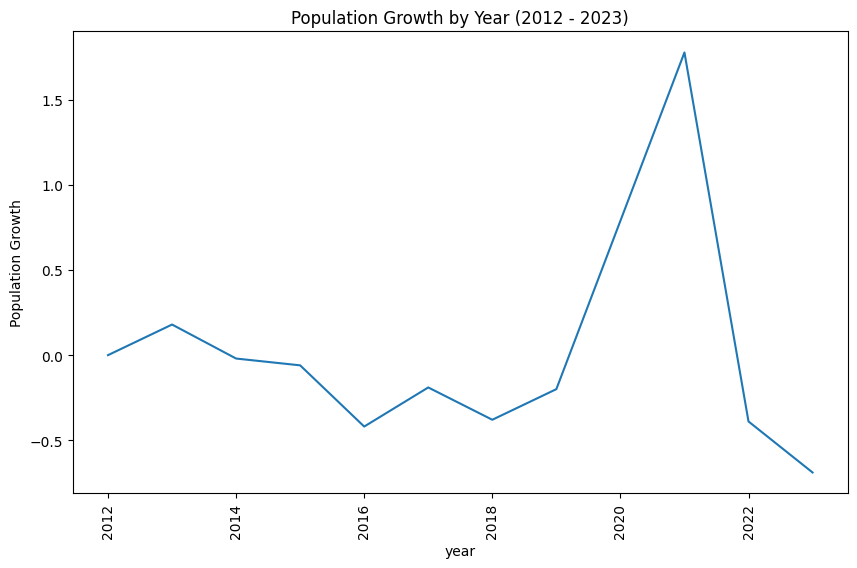

In [19]:
# Plot population growth
plt.figure(figsize=(10, 6))
plt.plot(acs1['year'], acs1['Pop_Growth_Rate'])
plt.xlabel('year')
plt.ylabel('Population Growth')
plt.title('Population Growth by Year (2012 - 2023)')
plt.xticks(rotation=90)
plt.show()


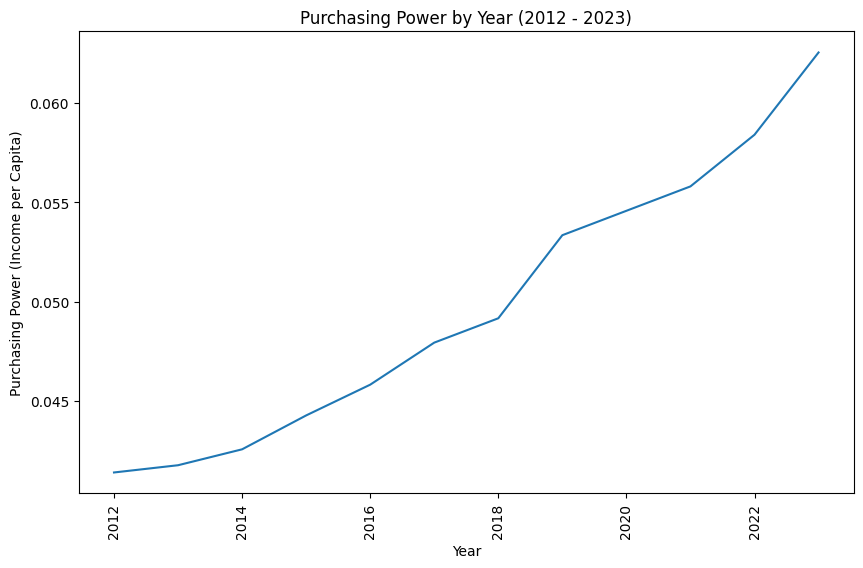

In [20]:
# Plot purchasing power
plt.figure(figsize=(10, 6))
plt.plot(acs1['year'], acs1['Purchasing_Power'])
plt.xlabel('Year')
plt.ylabel('Purchasing Power (Income per Capita)')
plt.title('Purchasing Power by Year (2012 - 2023)')
plt.xticks(rotation=90)
plt.show()

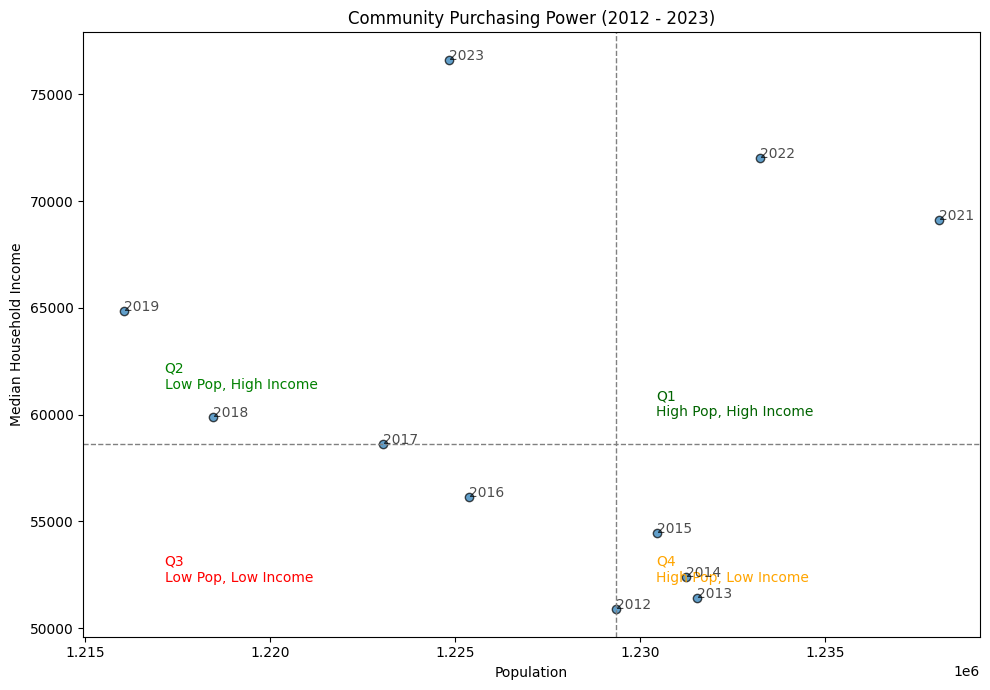

In [21]:
# Calculate medians to divide the quadrants
median_population = acs1['Population'].median()
median_income = acs1['Median_Household_Income'].median()

# Create scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(acs1['Population'], acs1['Median_Household_Income'], alpha=0.7, edgecolors='k')
plt.xlabel('Population')
plt.ylabel('Median Household Income')
plt.title('Community Purchasing Power (2012 - 2023)')

# Add quadrant lines (dashed)
plt.axvline(x=median_population, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=median_income, color='gray', linestyle='--', linewidth=1)

# Add quadrant labels
buffer_x = (acs1['Population'].max() - acs1['Population'].min()) * 0.05
buffer_y = (acs1['Median_Household_Income'].max() - acs1['Median_Household_Income'].min()) * 0.05

plt.text(median_population + buffer_x, median_income + buffer_y,
         'Q1\nHigh Pop, High Income', fontsize=10, color='darkgreen')
plt.text(acs1['Population'].min() + buffer_x, median_income + buffer_y*2,
         'Q2\nLow Pop, High Income', fontsize=10, color='green')
plt.text(acs1['Population'].min() + buffer_x, acs1['Median_Household_Income'].min() + buffer_y,
         'Q3\nLow Pop, Low Income', fontsize=10, color='red')
plt.text(median_population + buffer_x, acs1['Median_Household_Income'].min() + buffer_y,
         'Q4\nHigh Pop, Low Income', fontsize=10, color='orange')

# Add year labels to the scatter points
for i in range(len(acs1)):
    plt.text(acs1['Population'].iloc[i], acs1['Median_Household_Income'].iloc[i],
             str(acs1['year'].iloc[i]), fontsize=10, alpha=0.7, color='black')

plt.tight_layout()
plt.show()


In [22]:
class TimeSeriesForecaster:
    def __init__(self, data, time_column, value_column):
        """
        Initialize the forecaster with data, time column, and value column.

        :param data: DataFrame containing the time series data.
        :param time_column: The name of the time column (e.g., 'year').
        :param value_column: The name of the value column (e.g., 'population_growth').
        """
        data[time_column] = pd.to_datetime(data[time_column], format='%Y')
        self.df = data.set_index(time_column)
        self.time_column = time_column
        self.value_column = value_column

    def optimize_arima(self, p_values, d_values, q_values):
        """
        Optimize the ARIMA model by testing different combinations of (p, d, q).
        
        :param p_values: Range of p values to test (AR order).
        :param d_values: Range of d values to test (Differencing order).
        :param q_values: Range of q values to test (MA order).
        
        :return: Best fitted model and the best order (p, d, q).
        """
        best_aic = np.inf
        best_order = None
        best_model = None

        for p in p_values:
            for d in d_values:
                for q in q_values:
                    try:
                        model = ARIMA(self.df[self.value_column], order=(p, d, q))
                        model_fit = model.fit()

                        if model_fit.aic < best_aic:
                            best_aic = model_fit.aic
                            best_order = (p, d, q)
                            best_model = model_fit
                    except:
                        continue

        return best_model, best_order

    def forecast(self, model, steps=6, alpha=0.05):
        """
        Forecast future values using the fitted ARIMA model.
        
        :param model: Fitted ARIMA model.
        :param steps: Number of periods to forecast.
        :param alpha: Significance level for confidence intervals (default is 0.05 for 95% interval).
        
        :return: Forecasted values and the corresponding confidence intervals.
        """
        # help(model.forecast)
        conf = model.get_forecast(steps=steps, alpha=alpha)
        forecasts = model.forecast(steps=steps, alpha=alpha)

        return forecasts, conf

    def plot_forecast(self, forecast, conf_int, future_years):
        """
        Plot the historical data, forecasted data, and confidence intervals.
        
        :param forecast: Forecasted values.
        :param conf_int: Confidence intervals for the forecast.
        :param future_years: Years corresponding to the forecasted values.
        """
        plt.figure(figsize=(10, 6))
        
        prev = self.df.index.to_list()+future_years.to_list()
        values = np.concatenate([self.df[self.value_column].to_numpy(), forecast])

        # Historical data
        plt.plot(prev, values, label=f'Historical {self.value_column.capitalize()}', color='blue', marker='o')

        # Forecasted data
        plt.plot(future_years, forecast, label=f'Forecasted {self.value_column.capitalize()}', color='red', linestyle='--', marker='x')
        
        # Plot confidence intervals
        plt.fill_between(future_years, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='95% Prediction Interval')
        
        # Annotate forecasted values
        for i, year in enumerate(future_years):
            plt.text(year, forecast[i], f"{forecast[i]:.2f}", ha='center', color='red')
            plt.text(year, forecast[i] + conf_int[i, 1] - forecast[i], f"{forecast[i] + conf_int[i, 1] - forecast[i]:.2f}", ha='center', color='red')
            plt.text(year, forecast[i] - (conf_int[i, 1] - forecast[i]), f"{forecast[i] - conf_int[i, 1] + forecast[i]:.2f}", ha='center', color='red')


        
        # Labels and title
        plt.xlabel('Year')
        plt.ylabel(f'{self.value_column.capitalize()}')
        plt.title(f'{self.value_column.capitalize()} Forecast with Prediction Intervals')
        plt.legend()
        plt.grid(True)
        plt.show()

    def model_summary(self, model):
        """
        Print the summary of the fitted ARIMA model.
        
        :param model: The fitted ARIMA model.
        """
        print(f"Model Summary:\n{model.summary()}")

    def evaluate_model(self, model):
        """
        Calculate and print the AIC of the fitted ARIMA model.
        
        :param model: The fitted ARIMA model.
        """
        print(f"AIC: {model.aic}")

Best ARIMA model order: (0, 0, 2)


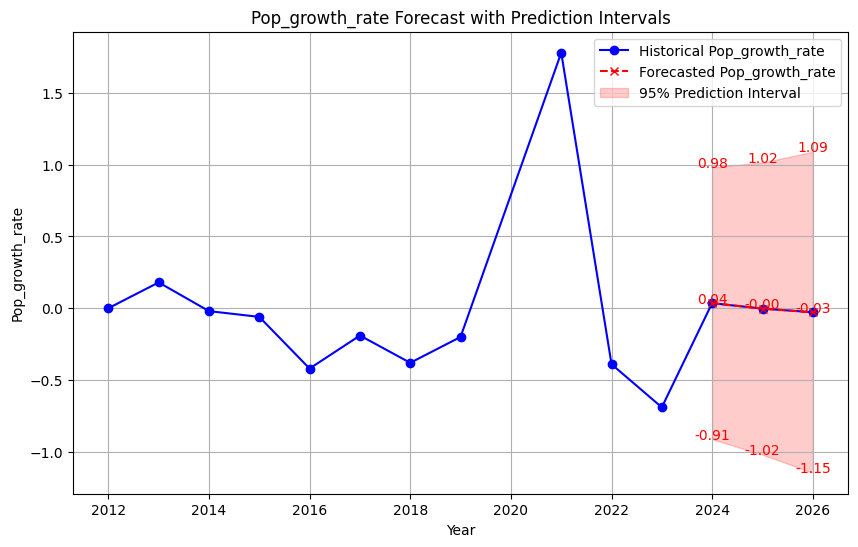

Model Summary:
                               SARIMAX Results                                
Dep. Variable:        Pop_Growth_Rate   No. Observations:                   11
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  -8.205
Date:                Fri, 23 May 2025   AIC                             24.410
Time:                        00:52:59   BIC                             26.001
Sample:                             0   HQIC                            23.407
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0278      0.141     -0.198      0.843      -0.304       0.248
ma.L1         -0.4720   2239.714     -0.000      1.000   -4390.230    4389.286
ma.L2         -0.5280   1183.418     

In [23]:
warnings.filterwarnings("ignore", category=Warning)


# Create an instance of the forecaster
forecaster = TimeSeriesForecaster(acs1, time_column='year', value_column='Pop_Growth_Rate')

# Step 1: Optimize ARIMA model (find the best (p, d, q) combination)
p_values = range(0, 3)  # Test AR orders (p)
d_values = range(0, 2)  # Test differencing orders (d)
q_values = range(0, 3)  # Test MA orders (q)
best_model, best_order = forecaster.optimize_arima(p_values, d_values, q_values)

# Print best model and order
print(f"Best ARIMA model order: {best_order}")

# Step 2: Forecast future values
steps = 3
forecast, conf = forecaster.forecast(best_model, steps=steps)

# Now generate the right number of future years
last_year = acs1['year'].dt.year.max()
future_years = pd.to_datetime(range(last_year + 1, last_year + 1 + steps), format='%Y')

# Step 3: Plot the forecast with prediction intervals
forecaster.plot_forecast(forecast.values, conf.conf_int().values, future_years)

# Step 4: Print the model summary and AIC
forecaster.model_summary(best_model)
forecaster.evaluate_model(best_model)

warnings.filterwarnings("default")  # This line will make warnings visible again

Best ARIMA model order: (1, 1, 0)


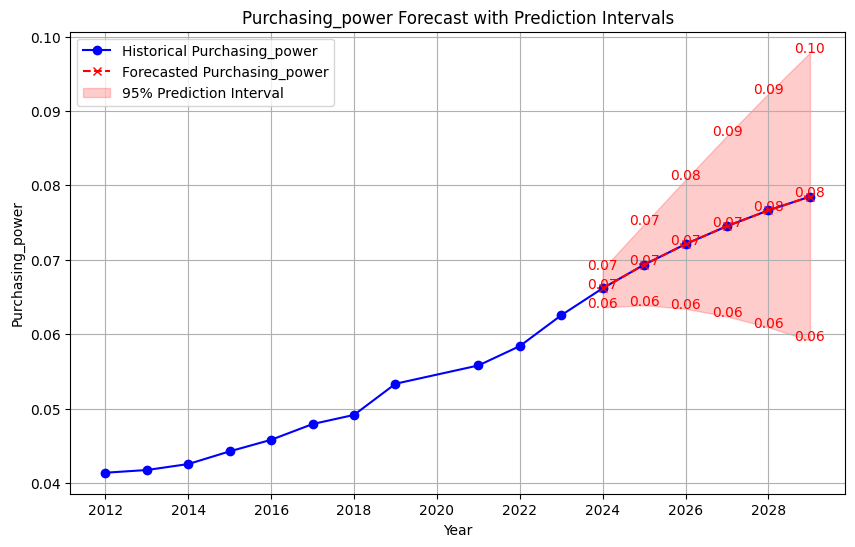

Model Summary:
                               SARIMAX Results                                
Dep. Variable:       Purchasing_Power   No. Observations:                   11
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  51.485
Date:                Fri, 23 May 2025   AIC                            -98.971
Time:                        00:53:03   BIC                            -98.366
Sample:                             0   HQIC                           -99.635
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8740      0.194      4.506      0.000       0.494       1.254
sigma2      1.711e-06   7.65e-07      2.237      0.025    2.12e-07    3.21e-06
Ljung-Box (L1) (Q):                  

In [24]:
warnings.filterwarnings("ignore", category=Warning)


# Create an instance of the forecaster
forecaster = TimeSeriesForecaster(acs1, time_column='year', value_column='Purchasing_Power')

# Step 1: Optimize ARIMA model (find the best (p, d, q) combination)
p_values = range(0, 3)  # Test AR orders (p)
d_values = range(0, 2)  # Test differencing orders (d)
q_values = range(0, 3)  # Test MA orders (q)
best_model, best_order = forecaster.optimize_arima(p_values, d_values, q_values)

# Print best model and order
print(f"Best ARIMA model order: {best_order}")

# Step 2: Forecast future values
steps = 6
forecast, conf = forecaster.forecast(best_model, steps=steps)

# Now generate the right number of future years
last_year = acs1['year'].dt.year.max()
future_years = pd.to_datetime(range(last_year + 1, last_year + 1 + steps), format='%Y')

# Step 3: Plot the forecast with prediction intervals
forecaster.plot_forecast(forecast.values, conf.conf_int().values, future_years)

# Step 4: Print the model summary and AIC
forecaster.model_summary(best_model)
forecaster.evaluate_model(best_model)

warnings.filterwarnings("default")  # This line will make warnings visible again

In [25]:
acs1.head()

,NAME,Median_Household_Income,Population,state,county,year,Estimated_Taxes,Disposable_Income,Purchasing_Power,Pop_Growth,Pop_Growth_Rate,Pop_Growth_Rate %
0,"Allegheny County, Pennsylvania",50884.0,1229338.0,42,3,2012-01-01,10176.8,40707.2,0.041391,0.0,0.00,0.0 %
1,"Allegheny County, Pennsylvania",51424.0,1231527.0,42,3,2013-01-01,10284.8,41139.2,0.041756,2189.0,0.18,0.18 %
2,"Allegheny County, Pennsylvania",52400.0,1231255.0,42,3,2014-01-01,10480.0,41920.0,0.042558,-272.0,-0.02,-0.02 %
3,"Allegheny County, Pennsylvania",54467.0,1230459.0,42,3,2015-01-01,10893.4,43573.6,0.044266,-796.0,-0.06,-0.06 %
4,"Allegheny County, Pennsylvania",56140.0,1225365.0,42,3,2016-01-01,11228.0,44912.0,0.045815,-5094.0,-0.42,-0.42 %


## Identify competition or opportunity

In [26]:
nonemp_naics = nonemp
cbp_naics = cbp

In [27]:
nonemp.head()

,NAME,COUNTY,NESTAB,NRCPTOT,YEAR,state,county,NAICS,NAICS_LABEL
0,"Allegheny County, Pennsylvania",3,8824,235012,2012,42,3,81,Other services (except public administration)
1,"Allegheny County, Pennsylvania",3,6134,146531,2012,42,3,812,Personal and laundry services
2,"Allegheny County, Pennsylvania",3,115,5316,2012,42,3,8123,Drycleaning and laundry services
3,"Allegheny County, Pennsylvania",3,65,3269,2012,42,3,81231,Coin-operated laundries and drycleaners
4,"Allegheny County, Pennsylvania",3,9154,241908,2013,42,3,81,Other services (except public administration)


In [28]:
nonemp_naics = nonemp_naics.copy()
nonemp_naics['year'] = pd.to_datetime(nonemp_naics['YEAR'], format='%Y')

cbp_naics = cbp_naics.copy()
cbp_naics['year'] = pd.to_datetime(cbp_naics['YEAR'], format='%Y')


In [29]:
cols_to_merge_on_acs1 = list(set(nonemp_naics.columns)
                        .intersection(set(cbp_naics.columns))
                        .intersection(set(acs1.columns)))

cols_to_merge_on = list(set(nonemp_naics.columns)
                        .intersection(set(cbp_naics.columns)))

print(cols_to_merge_on)
print(cols_to_merge_on_acs1)

['YEAR', 'NAICS', 'state', 'year', 'COUNTY', 'county', 'NAME', 'NAICS_LABEL']
['county', 'year', 'state', 'NAME']


In [30]:
competition = (acs1
               .merge(nonemp_naics, on=cols_to_merge_on_acs1)
               .merge(cbp_naics, on=cols_to_merge_on))

In [31]:
# Helps identify competition or opportunity.
competition['Number_of_Businesses'] = competition['ESTAB']+competition['NESTAB']
competition['Business_Density'] = competition['Number_of_Businesses']/competition['Population']*1000
competition['Business_Density_ESTAB'] = competition['ESTAB']/competition['Population']*1000
competition['Business_Density_NESTAB'] = competition['NESTAB']/competition['Population']*1000

competition['expected_annual_revenue_NESTAB'] = (competition['NRCPTOT']/competition['NESTAB']).round(2)
competition['expected_annual_payroll_ESTAB'] = (competition['PAYANN']/competition['ESTAB']).round(2)


competition[['year','NAME','NAICS_LABEL','Number_of_Businesses','ESTAB','EMP','NESTAB',
             'expected_annual_revenue_NESTAB', 'expected_annual_payroll_ESTAB',
             'Business_Density','Business_Density_ESTAB','Business_Density_NESTAB']].head()

,year,NAME,NAICS_LABEL,Number_of_Businesses,ESTAB,EMP,NESTAB,expected_annual_revenue_NESTAB,expected_annual_payroll_ESTAB,Business_Density,Business_Density_ESTAB,Business_Density_NESTAB
0,2012-01-01,"Allegheny County, Pennsylvania",Other services (except public administration),12637,3813,30150,8824,26.63,221.48,10.279516,3.101669,7.177847
1,2012-01-01,"Allegheny County, Pennsylvania",Personal and laundry services,7459,1325,9216,6134,23.89,162.26,6.067493,1.077816,4.989677
2,2012-01-01,"Allegheny County, Pennsylvania",Drycleaning and laundry services,222,107,1397,115,46.23,311.45,0.180585,0.087039,0.093546
3,2012-01-01,"Allegheny County, Pennsylvania",Coin-operated laundries and drycleaners,84,19,108,65,50.29,155.05,0.068329,0.015455,0.052874
4,2013-01-01,"Allegheny County, Pennsylvania",Other services (except public administration),12985,3831,30620,9154,26.43,228.93,10.543821,3.110772,7.433049


### From this analysis, we’ll identify: 
- **Business Saturation and Industry Concentration** – Analyzes industry saturation and identifies underserved sectors.
- **Oversaturated sectors:** High establishment density, small firm size
- **Underserved sectors:** Low density, large firm size



In [32]:
# Calculate establishments per 10,000 people
competition['est_per_10k'] = (competition['ESTAB'] / competition['Population']) * 10000

# Calculate average employees per establishment
competition['emp_per_est'] = competition['EMP'] / competition['ESTAB']

In [33]:
# Filter for industries with low saturation but high average size
underserved = competition[(competition['est_per_10k'] < competition['est_per_10k'].quantile(0.25)) &
                 (competition['emp_per_est'] > competition['emp_per_est'].quantile(0.75))]

print("Underserved Industries:")
print(underserved[['NAICS', 'est_per_10k', 'emp_per_est']])

Underserved Industries:
Empty DataFrame
Columns: [NAICS, est_per_10k, emp_per_est]
Index: []


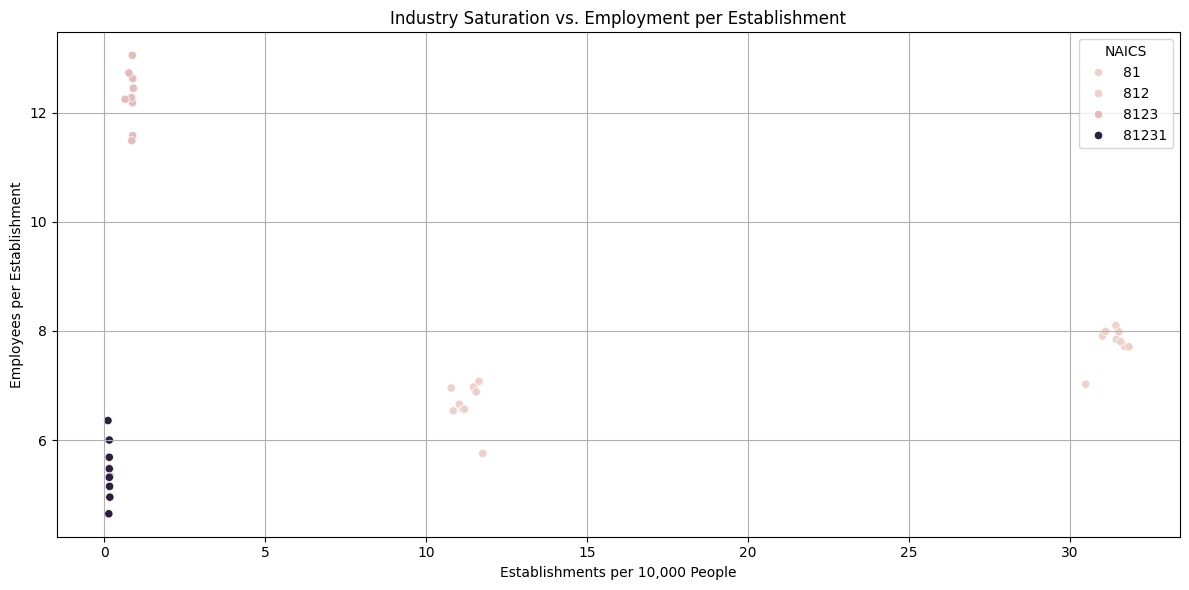

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=competition, x='est_per_10k', y='emp_per_est', hue='NAICS')
plt.title('Industry Saturation vs. Employment per Establishment')
plt.xlabel('Establishments per 10,000 People')
plt.ylabel('Employees per Establishment')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights
From this analysis, you’ll identify:
- Oversaturated sectors: High establishment density, small firm size
- Underserved sectors: Low density, large firm size

**Advanced**: Location Quotient (LQ)

Compare a region’s industry share to the national average.

**Calculate** LQ = (Local share of industry / Local total) / (National share of industry / National total)

 You'd need national data too:
1. Fetch national totals for each NAICS
1. Calculate LQ for each sector

**Pseudocode**:
```LQ = (state_estab_i / state_total_estab) / (us_estab_i / us_total_estab)```

**Interpretation**:
- High ESTAB values → Possibly saturated sectors.
- Low ESTAB with high demand → Opportunity for new entrants.
- High LQ (>1.25) → Industry concentration above average (potential saturation).
- Low LQ (<0.75) → Potentially underserved.

### Optional Next Steps:
- Use geopandas to map this data geographically.
- Add business data using sources like Yelp API or Google Places API for competitor analysis.
- Use clustering (sklearn) to group similar counties/tracts.

### Gather American Community Survey 5-Year Data (2012 - 2023)

In [35]:
acs5_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{acs5_params['dataset_base'].replace('/', '_')}_P1.csv'
if os.path.exists(acs5_file_path):
    acs5_1 = pd.read_csv(acs5_file_path)
else: 
    acs5_all_years = []
    for i in range(2012, 2026):    
        acs5_params['year'] = i
        acs5_params['variables'] = "NAME,B01003_001E,B19013_001E,B01002_001E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B01001_012E,B01001_011E,B01001_014E,B01001_013E,B01001_016E,B01001_015E,B01001_019E,B01001_017E,B01001_018E,B01001_020E,B01001_022E,B01001_021E,B01001_024E,B01001_023E,B01001_028E,B01001_029E,B01001_027E,B01001_030E,B01001_032E,B01001_031E,B01001_034E,B01001_033E,B01001_036E,B01001_035E,B01001_038E,B01001_037E,B01001_039E,B01001_040E,B01001_042E,B01001_041E,B01001_044E,B01001_043E,B01001_046E"
        try:
            acs5 = pd.DataFrame(get_data(acs5_params))
            acs5.columns = acs5.iloc[0]
            acs5 = acs5.iloc[1:]     
            acs5['year'] = i    
            acs5_all_years.append(acs5)

            print(f'finished year {i}')
        except:
            print(f'failed year {i}')

    acs5_1 = pd.concat(acs5_all_years)
    acs5_1.to_csv(acs5_file_path, index=False)

print(acs5_1.info())
acs5_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         4792 non-null   object 
 1   B01003_001E  4792 non-null   int64  
 2   B19013_001E  4791 non-null   float64
 3   B01002_001E  4792 non-null   float64
 4   B15003_022E  4792 non-null   int64  
 5   B15003_023E  4792 non-null   int64  
 6   B15003_024E  4792 non-null   int64  
 7   B15003_025E  4792 non-null   int64  
 8   B01001_012E  4792 non-null   int64  
 9   B01001_011E  4792 non-null   int64  
 10  B01001_014E  4792 non-null   int64  
 11  B01001_013E  4792 non-null   int64  
 12  B01001_016E  4792 non-null   int64  
 13  B01001_015E  4792 non-null   int64  
 14  B01001_019E  4792 non-null   int64  
 15  B01001_017E  4792 non-null   int64  
 16  B01001_018E  4792 non-null   int64  
 17  B01001_020E  4792 non-null   int64  
 18  B01001_022E  4792 non-null   int64  
 19  B01001

,NAME,B01003_001E,B19013_001E,B01002_001E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B01001_012E,B01001_011E,...,B01001_040E,B01001_042E,B01001_041E,B01001_044E,B01001_043E,B01001_046E,state,county,tract,year
0,"Census Tract 3204, Allegheny County, Pennsylvania",2177,50686.0,44.3,124,50,10,15,95,37,...,88,14,102,0,54,53,42,3,320400,2012
1,"Census Tract 4070.02, Allegheny County, Pennsy...",6858,69710.0,43.7,1060,442,167,17,173,185,...,343,146,340,65,18,49,42,3,407002,2012
2,"Census Tract 4110, Allegheny County, Pennsylvania",6971,128409.0,41.2,1517,998,385,139,123,87,...,314,42,233,20,52,60,42,3,411000,2012
3,"Census Tract 4263, Allegheny County, Pennsylvania",5999,68211.0,46.3,957,422,70,90,250,180,...,205,92,160,33,226,162,42,3,426300,2012
4,"Census Tract 4732, Allegheny County, Pennsylvania",3094,50823.0,42.1,587,340,102,72,141,170,...,139,66,69,48,25,76,42,3,473200,2012


In [36]:
acs5_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{acs5_params['dataset_base'].replace('/', '_')}_P2.csv'
if os.path.exists(acs5_file_path):
    acs5_2 = pd.read_csv(acs5_file_path)
else: 
    acs5_all_years = []
    for i in range(2012, 2026):    
        acs5_params['year'] = i
        acs5_params['variables'] = "NAME,B01001_045E,B01001_048E,B01001_047E,B01001_004E,B01001_003E,B01001_006E,B01001_007E,B01001_005E,B01001_009E,B01001_008E,B01001_010E,B19083_001E,C02003_008E,C02003_004E,C02003_003E,C02003_007E,C02003_006E,C02003_005E,B11001_001E,B11001_002E,B11001_003E,B11001_004E,B11001_005E,B11001_007E,B15003_001E,B15003_017E,B15003_021E,C24010_001E,C24010_003E,C24010_004E,C24010_005E,C24010_006E,C24010_007E,C24010_014E,C24010_022E,C24010_027E,C24010_033E,C24010_042E,C24010_048E,C24010_050E,C17002_002E,C17002_003E"
        try:
            acs5 = pd.DataFrame(get_data(acs5_params))
            acs5.columns = acs5.iloc[0]
            acs5 = acs5.iloc[1:]     
            acs5['year'] = i    
            acs5_all_years.append(acs5)

            print(f'finished year {i}')
        except:
            print(f'failed year {i}')

    acs5_2 = pd.concat(acs5_all_years)
    acs5_2.to_csv(acs5_file_path, index=False)

print(acs5_2.info())
acs5_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         4792 non-null   object 
 1   B01001_045E  4792 non-null   int64  
 2   B01001_048E  4792 non-null   int64  
 3   B01001_047E  4792 non-null   int64  
 4   B01001_004E  4792 non-null   int64  
 5   B01001_003E  4792 non-null   int64  
 6   B01001_006E  4792 non-null   int64  
 7   B01001_007E  4792 non-null   int64  
 8   B01001_005E  4792 non-null   int64  
 9   B01001_009E  4792 non-null   int64  
 10  B01001_008E  4792 non-null   int64  
 11  B01001_010E  4792 non-null   int64  
 12  B19083_001E  4792 non-null   float64
 13  C02003_008E  4792 non-null   int64  
 14  C02003_004E  4792 non-null   int64  
 15  C02003_003E  4792 non-null   int64  
 16  C02003_007E  4792 non-null   int64  
 17  C02003_006E  4792 non-null   int64  
 18  C02003_005E  4792 non-null   int64  
 19  B11001

,NAME,B01001_045E,B01001_048E,B01001_047E,B01001_004E,B01001_003E,B01001_006E,B01001_007E,B01001_005E,B01001_009E,...,C24010_033E,C24010_042E,C24010_048E,C24010_050E,C17002_002E,C17002_003E,state,county,tract,year
0,"Census Tract 3204, Allegheny County, Pennsylvania",45,23,38,35,33,29,26,74,21,...,6,71,0,63,96,131,42,3,320400,2012
1,"Census Tract 4070.02, Allegheny County, Pennsy...",64,156,174,190,201,70,120,144,56,...,254,60,18,178,261,246,42,3,407002,2012
2,"Census Tract 4110, Allegheny County, Pennsylvania",37,86,93,291,127,229,88,377,42,...,62,109,29,192,0,98,42,3,411000,2012
3,"Census Tract 4263, Allegheny County, Pennsylvania",77,146,108,175,125,118,19,117,0,...,141,73,124,119,56,158,42,3,426300,2012
4,"Census Tract 4732, Allegheny County, Pennsylvania",38,97,43,84,86,69,7,83,6,...,42,40,9,93,161,83,42,3,473200,2012


In [37]:
acs5_file_path = f'data/{NAICS}_{COUNTYCODE}_{STATEFIPS}_{acs5_params['dataset_base'].replace('/', '_')}_P3.csv'
if os.path.exists(acs5_file_path):
    acs5_3 = pd.read_csv(acs5_file_path)
else: 
    acs5_all_years = []
    for i in range(2012, 2026):    
        acs5_params['year'] = i
        acs5_params['variables'] = "NAME,B25001_001E,B25002_002E,B25002_003E,B25003_001E,B25003_002E,B25003_003E,B25024_002E,B25024_003E,B25024_004E,B25024_005E,B25024_006E,B25024_007E,B25024_008E,B25024_009E,B25024_010E,B23025_005E,B23025_003E"
        try:
            acs5 = pd.DataFrame(get_data(acs5_params))
            acs5.columns = acs5.iloc[0]
            acs5 = acs5.iloc[1:]     
            acs5['year'] = i    
            acs5_all_years.append(acs5)

            print(f'finished year {i}')
        except:
            print(f'failed year {i}')

    acs5_3 = pd.concat(acs5_all_years)
    acs5_3.to_csv(acs5_file_path, index=False)

print(acs5_3.info())
acs5_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         4792 non-null   object
 1   B25001_001E  4792 non-null   int64 
 2   B25002_002E  4792 non-null   int64 
 3   B25002_003E  4792 non-null   int64 
 4   B25003_001E  4792 non-null   int64 
 5   B25003_002E  4792 non-null   int64 
 6   B25003_003E  4792 non-null   int64 
 7   B25024_002E  4792 non-null   int64 
 8   B25024_003E  4792 non-null   int64 
 9   B25024_004E  4792 non-null   int64 
 10  B25024_005E  4792 non-null   int64 
 11  B25024_006E  4792 non-null   int64 
 12  B25024_007E  4792 non-null   int64 
 13  B25024_008E  4792 non-null   int64 
 14  B25024_009E  4792 non-null   int64 
 15  B25024_010E  4792 non-null   int64 
 16  B23025_005E  4792 non-null   int64 
 17  B23025_003E  4792 non-null   int64 
 18  state        4792 non-null   int64 
 19  county       4792 non-null 

,NAME,B25001_001E,B25002_002E,B25002_003E,B25003_001E,B25003_002E,B25003_003E,B25024_002E,B25024_003E,B25024_004E,...,B25024_007E,B25024_008E,B25024_009E,B25024_010E,B23025_005E,B23025_003E,state,county,tract,year
0,"Census Tract 3204, Allegheny County, Pennsylvania",936,936,0,936,739,197,767,72,41,...,0,0,0,0,113,1253,42,3,320400,2012
1,"Census Tract 4070.02, Allegheny County, Pennsy...",2706,2643,63,2643,2300,343,2308,238,76,...,43,0,15,15,268,3741,42,3,407002,2012
2,"Census Tract 4110, Allegheny County, Pennsylvania",2398,2214,184,2214,2021,193,2108,223,10,...,26,0,0,15,160,3516,42,3,411000,2012
3,"Census Tract 4263, Allegheny County, Pennsylvania",2482,2443,39,2443,2429,14,2399,12,0,...,71,0,0,0,211,3300,42,3,426300,2012
4,"Census Tract 4732, Allegheny County, Pennsylvania",1640,1519,121,1519,749,770,596,62,109,...,82,218,360,0,69,1757,42,3,473200,2012


In [38]:
common_acs_cols = list(set(acs5_1.columns).intersection(acs5_2))
print(common_acs_cols)
acs5 = (acs5_1
        .merge(acs5_2, on=common_acs_cols)
        .merge(acs5_3, on=common_acs_cols))

['tract', 'state', 'year', 'county', 'NAME']


In [70]:
acs5['NAME'] = acs5[['state', 'tract', 'county']].astype(str).sum(axis=1)

In [71]:
acs5[['state', 'tract', 'year', 'county','NAME']].head()

,state,tract,year,county,NAME
0,42.0,320400.0,2012.0,3.0,42.0320400.03.0
1,42.0,407002.0,2012.0,3.0,42.0407002.03.0
2,42.0,411000.0,2012.0,3.0,42.0411000.03.0
3,42.0,426300.0,2012.0,3.0,42.0426300.03.0
4,42.0,473200.0,2012.0,3.0,42.0473200.03.0


#### Search Column Variables

In [72]:
create_data_dictionary(f"{base_url}/2022/{acs5_params['dataset_base']}/variables.json", 'C24010_001E')

data/acs_acs5_variables.json exists and successfully downloaded
'C24010_001E': 'Estimate!!Total: Sex by Occupation for the Civilian Employed Population 16 Years and Over',


In [73]:
search_variables_in_data_dictionary(f"{base_url}/2022/{acs5_params['dataset_base']}/variables.json", "years Sex by Age_")

data/acs_acs5_variables.json exists and successfully downloaded


In [74]:
print(acs5.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4784
Columns: 132 entries, NAME to Poverty_Rate
dtypes: float64(131), object(1)
memory usage: 4.8+ MB
None


In [75]:
acs5_cols_to_rename = {
    'B01003_001E': 'Population',
    'B19013_001E': 'Median_Income',
    'B01002_001E': 'Median_Age',
    'B15003_022E': 'Bachelors',
    'B15003_023E': 'Masters',
    'B15003_024E': 'Professional',
    'B15003_025E': 'Doctorate',
    'B01001_012E': 'M_30_34',
    'B01001_011E': 'M_25_29',
    'B01001_014E': 'M_40_44',
    'B01001_013E': 'M_35_39',
    'B01001_016E': 'M_50_54',
    'B01001_015E': 'M_45_49',
    'B01001_019E': 'M_62_64',
    'B01001_017E': 'M_55_59',
    'B01001_018E': 'M_60_61',
    'B01001_020E': 'M_65_66',
    'B01001_022E': 'M_70_74',
    'B01001_021E': 'M_67_69',
    'B01001_024E': 'M_80_84',
    'B01001_023E': 'M_75_79',
    'B01001_028E': 'F_5_9',
    'B01001_029E': 'F_10_14',
    'B01001_027E': 'F_0_5',
    'B01001_030E': 'F_15_17',
    'B01001_032E': 'F_20',
    'B01001_031E': 'F_18_19',
    'B01001_034E': 'F_22_24',
    'B01001_033E': 'F_21',
    'B01001_036E': 'F_30_34',
    'B01001_035E': 'F_25_29',
    'B01001_038E': 'F_40_44',
    'B01001_037E': 'F_35_39',
    'B01001_039E': 'F_45_49',
    'B01001_040E': 'F_50_54',
    'B01001_042E': 'F_60_61',
    'B01001_041E': 'F_55_59',
    'B01001_044E': 'F_65_66',
    'B01001_043E': 'F_62_64',
    'B01001_046E': 'F_70_74',
    'B01001_045E': 'F_67_69',
    'B01001_048E': 'F_80_84',
    'B01001_047E': 'F_75_79',
    'B01001_004E': 'M_5_9',
    'B01001_003E': 'M_0_5',
    'B01001_006E': 'M_15_17',
    'B01001_007E': 'M_18_19',
    'B01001_005E': 'M_10_14',
    'B01001_009E': 'M_21',
    'B01001_008E': 'M_20',
    'B01001_010E': 'M_22_24',
    'B19083_001E': 'Gini_Index',
    'C02003_008E': 'Other',
    'C02003_004E': 'Black',
    'C02003_003E': 'White',
    'C02003_007E': 'Native_Hawaiian_and_Other_Pacific_Islander',
    'C02003_006E': 'Asian',
    'C02003_005E': 'American_Indian_and_Alaska_Native',
    'B11001_001E': 'Total Households',
    'B11001_002E': 'Family Households',
    'B11001_003E': 'Married Couple Families',
    'B11001_004E': 'Male Householder No Wife',
    'B11001_005E': 'Female Householder No Husband',
    'B11001_007E': 'Nonfamily Households',
    'B15003_001E': 'Total',
    'B15003_017E': 'High School',
    'B15003_021E': "Associate's",
    'C24010_001E': 'Total Employed',
    'C24010_003E': 'Management',
    'C24010_004E': 'Business',
    'C24010_005E': 'Computer',
    'C24010_006E': 'Engineering',
    'C24010_007E': 'Science',
    'C24010_014E': 'Healthcare',
    'C24010_022E': 'Protective Service',
    'C24010_027E': 'Sales',
    'C24010_033E': 'Office Support',
    'C24010_042E': 'Construction',
    'C24010_048E': 'Production',
    'C24010_050E': 'Transportation',
    "B25001_001E": "Total_Housing_Units",
    "B25002_002E": "Occupied_Units",
    "B25002_003E": "Vacant_Units",
    "B25003_001E": "Total_Tenure",
    "B25003_002E": "Owner_Occupied",
    "B25003_003E": "Renter_Occupied",
    "B25024_002E": "1-Unit_Detached",
    "B25024_003E": "1-Unit_Attached",
    "B25024_004E": "2_Units",
    "B25024_005E": "3_4_Units",
    "B25024_006E": "5_9_Units",
    "B25024_007E": "10_19_Units",
    "B25024_008E": "20+_Units",
    "B25024_009E": "Mobile_Homes",
    "B25024_010E": "Other_Housing",
    'B23025_005E': 'Unemployed',
    'B23025_003E': 'Labor_force'
}

In [76]:
age_range_parsed = [int(val) for val in target_market['demographics']['age_range'].split('–')]
age_range = range(age_range_parsed[0], age_range_parsed[1])
age_range

range(18, 55)

In [77]:
age_columns = {k: v for k, v in acs5_cols_to_rename.items() \
               if ('B01001' in k) \
               and (int(v.split("_")[1:][0]) in age_range) \
                and (int(v.split("_")[1:][-1]) in age_range)}
age_columns

{'B01001_012E': 'M_30_34',
 'B01001_011E': 'M_25_29',
 'B01001_014E': 'M_40_44',
 'B01001_013E': 'M_35_39',
 'B01001_016E': 'M_50_54',
 'B01001_015E': 'M_45_49',
 'B01001_032E': 'F_20',
 'B01001_031E': 'F_18_19',
 'B01001_034E': 'F_22_24',
 'B01001_033E': 'F_21',
 'B01001_036E': 'F_30_34',
 'B01001_035E': 'F_25_29',
 'B01001_038E': 'F_40_44',
 'B01001_037E': 'F_35_39',
 'B01001_039E': 'F_45_49',
 'B01001_040E': 'F_50_54',
 'B01001_007E': 'M_18_19',
 'B01001_009E': 'M_21',
 'B01001_008E': 'M_20',
 'B01001_010E': 'M_22_24'}

In [78]:
age_M_columns = {k: v for k, v in age_columns.items() if ('M' in v)}
age_M_columns

{'B01001_012E': 'M_30_34',
 'B01001_011E': 'M_25_29',
 'B01001_014E': 'M_40_44',
 'B01001_013E': 'M_35_39',
 'B01001_016E': 'M_50_54',
 'B01001_015E': 'M_45_49',
 'B01001_007E': 'M_18_19',
 'B01001_009E': 'M_21',
 'B01001_008E': 'M_20',
 'B01001_010E': 'M_22_24'}

In [79]:
age_F_columns = {k: v for k, v in age_columns.items() if ('F' in v)}
age_F_columns

{'B01001_032E': 'F_20',
 'B01001_031E': 'F_18_19',
 'B01001_034E': 'F_22_24',
 'B01001_033E': 'F_21',
 'B01001_036E': 'F_30_34',
 'B01001_035E': 'F_25_29',
 'B01001_038E': 'F_40_44',
 'B01001_037E': 'F_35_39',
 'B01001_039E': 'F_45_49',
 'B01001_040E': 'F_50_54'}

In [80]:
# Rename columns for clarity
acs5.rename(columns=acs5_cols_to_rename, inplace=True)

## We will have the follwoing in the next cells
* **Age Cohort Analysis** – Identifies dominant age groups to tailor services.
* **Language & Cultural Composition Mapping** – Analyzes diversity for localized strategies.
* **Poverty and Assistance Needs Analysis** – Identifies areas with economic disadvantages.
* **Family and Household Composition** – Assesses family structures and sizes.
* **Educational Attainment & Skills Assessment** – Analyzes education levels and workforce skills.
* **Housing Characteristics Review** – Examines housing types, ownership, and vacancy data.

Also after checking
- Set Median Income > 0

In [81]:
for col in acs5.columns:
    try:
        acs5[col] = acs5[col].astype(float)
    except:
        pass

In [82]:
acs5 = acs5[acs5['Median_Income']>0]

In [83]:
acs5 = acs5.copy()
acs5['Unemployment_Rate'] = acs5['Unemployed'] / acs5['Labor_force'] * 100

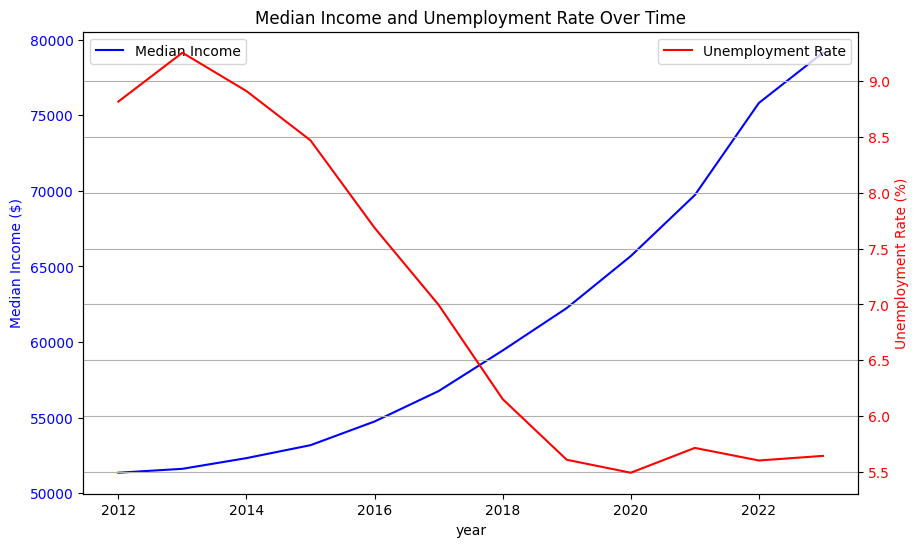

In [84]:
# Group by year and calculate averages (if you have multiple entries per year)
trend_data = acs5.groupby('year').agg({
    'Median_Income': 'mean',
    'Unemployment_Rate': 'mean'
}).reset_index()

# Plot both trends
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=trend_data, x='year', y='Median_Income', ax=ax1, color='blue', label='Median Income')
ax1.set_ylabel('Median Income ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add second axis for unemployment rate
ax2 = ax1.twinx()
sns.lineplot(data=trend_data, x='year', y='Unemployment_Rate', ax=ax2, color='red', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Median Income and Unemployment Rate Over Time')
plt.grid(True)
plt.show()


Best ARIMA model order: (1, 1, 1)


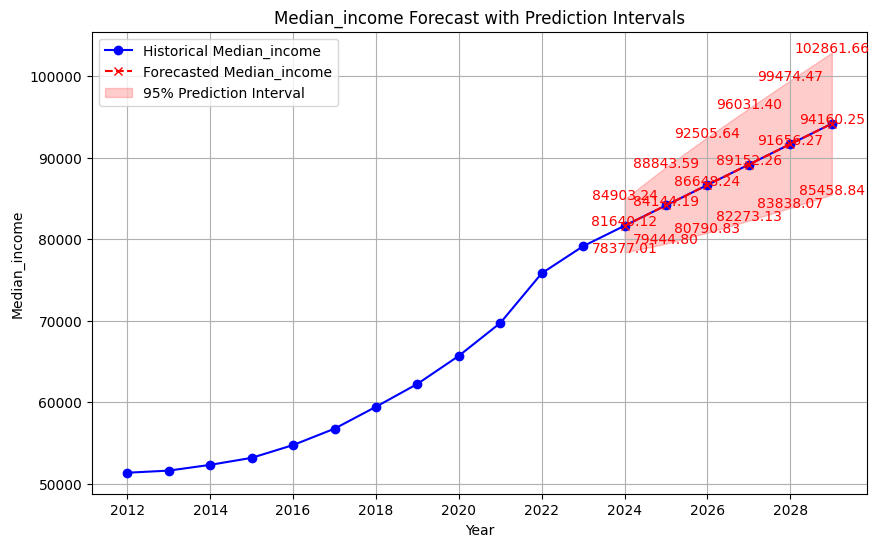

Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Median_Income   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -97.201
Date:                Fri, 23 May 2025   AIC                            200.403
Time:                        00:56:07   BIC                            201.597
Sample:                    01-01-2012   HQIC                           199.651
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.007    146.895      0.000       0.987       1.013
ma.L1         -0.9989      0.440     -2.270      0.023      -1.861      -0.137
sigma2      2.672e+06   1.53e-07   1.

In [85]:
warnings.filterwarnings("ignore", category=Warning)


# Create an instance of the forecaster
forecaster = TimeSeriesForecaster(trend_data, time_column='year', value_column='Median_Income')

# Step 1: Optimize ARIMA model (find the best (p, d, q) combination)
p_values = range(0, 3)  # Test AR orders (p)
d_values = range(0, 2)  # Test differencing orders (d)
q_values = range(0, 3)  # Test MA orders (q)
best_model, best_order = forecaster.optimize_arima(p_values, d_values, q_values)

# Print best model and order
print(f"Best ARIMA model order: {best_order}")

# Step 2: Forecast future values
steps = 6
forecast, conf = forecaster.forecast(best_model, steps=steps)

# Now generate the right number of future years
last_year = acs1['year'].dt.year.max()
future_years = pd.to_datetime(range(last_year + 1, last_year + 1 + steps), format='%Y')

# Step 3: Plot the forecast with prediction intervals
forecaster.plot_forecast(forecast.values, conf.conf_int().values, future_years)

# Step 4: Print the model summary and AIC
forecaster.model_summary(best_model)
forecaster.evaluate_model(best_model)

warnings.filterwarnings("default")  # This line will make warnings visible again

Best ARIMA model order: (0, 1, 2)


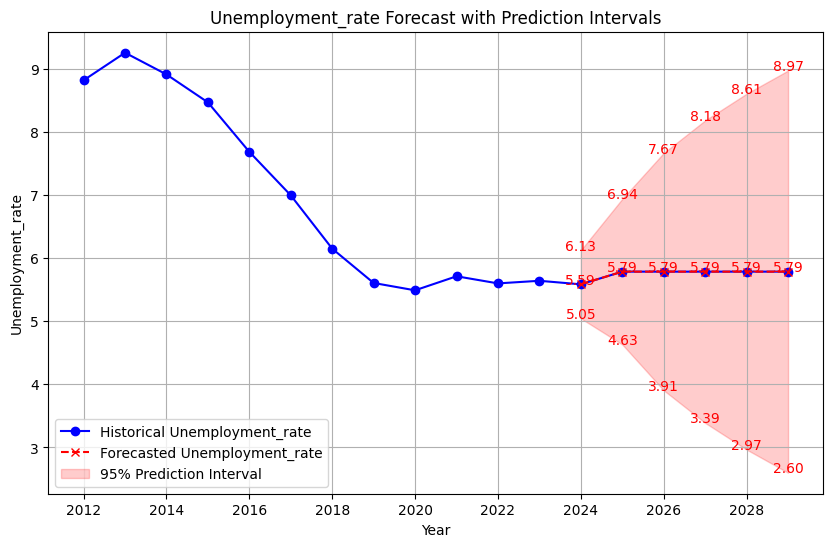

Model Summary:
                               SARIMAX Results                                
Dep. Variable:      Unemployment_Rate   No. Observations:                   12
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  -2.591
Date:                Fri, 23 May 2025   AIC                             11.183
Time:                        00:56:09   BIC                             12.376
Sample:                    01-01-2012   HQIC                            10.430
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9678    107.863      0.009      0.993    -210.439     212.375
ma.L2          0.9986    222.824      0.004      0.996    -435.729     437.726
sigma2         0.0653     14.519     

In [86]:
warnings.filterwarnings("ignore", category=Warning)


# Create an instance of the forecaster
forecaster = TimeSeriesForecaster(trend_data, time_column='year', value_column='Unemployment_Rate')

# Step 1: Optimize ARIMA model (find the best (p, d, q) combination)
p_values = range(0, 3)  # Test AR orders (p)
d_values = range(0, 2)  # Test differencing orders (d)
q_values = range(0, 3)  # Test MA orders (q)
best_model, best_order = forecaster.optimize_arima(p_values, d_values, q_values)

# Print best model and order
print(f"Best ARIMA model order: {best_order}")

# Step 2: Forecast future values
steps = 6
forecast, conf = forecaster.forecast(best_model, steps=steps)

# Now generate the right number of future years
last_year = acs1['year'].dt.year.max()
future_years = pd.to_datetime(range(last_year + 1, last_year + 1 + steps), format='%Y')

# Step 3: Plot the forecast with prediction intervals
forecaster.plot_forecast(forecast.values, conf.conf_int().values, future_years)

# Step 4: Print the model summary and AIC
forecaster.model_summary(best_model)
forecaster.evaluate_model(best_model)

warnings.filterwarnings("default")  # This line will make warnings visible again

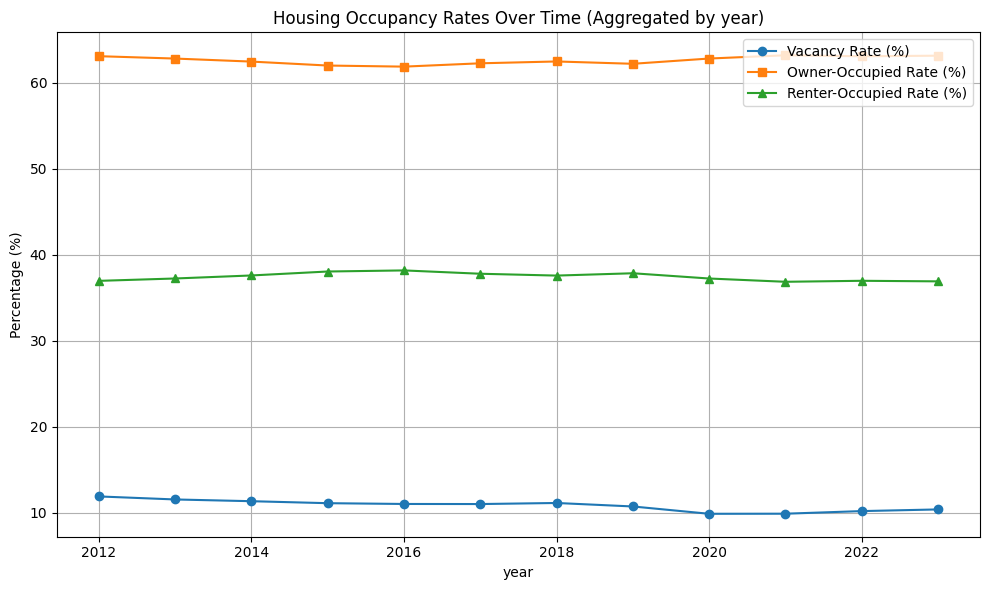

In [87]:
# Add calculations
acs5 = acs5.copy()
acs5["Vacancy_Rate (%)"] = 100 * acs5["Vacant_Units"] / acs5["Total_Housing_Units"]
acs5["Owner_Rate (%)"] = 100 * acs5["Owner_Occupied"] / acs5["Total_Tenure"]
acs5["Renter_Rate (%)"] = 100 * acs5["Renter_Occupied"] / acs5["Total_Tenure"]

# Group by year and calculate the mean for each group
acs5_yearly = acs5.groupby("year").mean(numeric_only=True).reset_index()

# Plot Vacancy, Owner, and Renter Rates over time
plt.figure(figsize=(10, 6))
plt.plot(acs5_yearly["year"], acs5_yearly["Vacancy_Rate (%)"], label="Vacancy Rate (%)", marker='o')
plt.plot(acs5_yearly["year"], acs5_yearly["Owner_Rate (%)"], label="Owner-Occupied Rate (%)", marker='s')
plt.plot(acs5_yearly["year"], acs5_yearly["Renter_Rate (%)"], label="Renter-Occupied Rate (%)", marker='^')

plt.title("Housing Occupancy Rates Over Time (Aggregated by year)")
plt.xlabel("year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


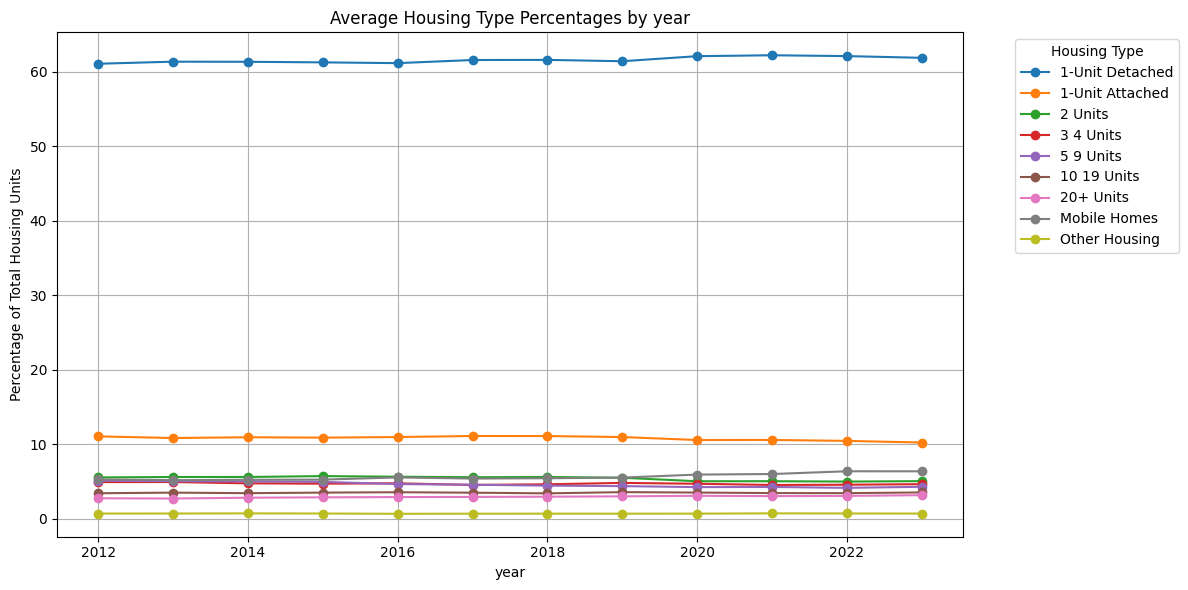

In [88]:
# List of housing type columns
housing_type_cols = [
    "1-Unit_Detached", "1-Unit_Attached", "2_Units", "3_4_Units",
    "5_9_Units", "10_19_Units", "20+_Units", "Mobile_Homes", "Other_Housing"
]

# Calculate percentage columns
for col in housing_type_cols:
    acs5[col + "_Pct"] = 100 * acs5[col] / acs5["Total_Housing_Units"]

# Aggregate by year (mean across geographies)
grouped = acs5.groupby("year")[[col + "_Pct" for col in housing_type_cols]].mean()

# Rename columns for readability
grouped.columns = [col.replace("_Pct", "").replace("_", " ") for col in grouped.columns]

# Plotting
plt.figure(figsize=(12, 6))
for col in grouped.columns:
    plt.plot(grouped.index, grouped[col], label=col, marker='o')

plt.title("Average Housing Type Percentages by year")
plt.xlabel("year")
plt.ylabel("Percentage of Total Housing Units")
plt.legend(title="Housing Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


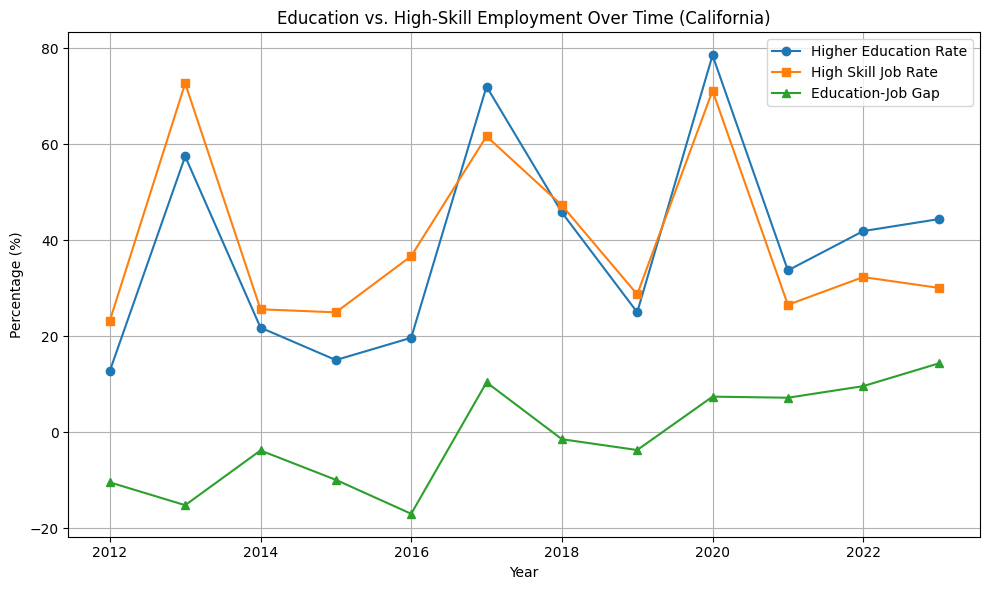

In [89]:
# Grouped aggregation by year
acs5['HighEd'] = acs5[["Bachelors", "Masters", 'Professional', 'Doctorate']].sum(axis=1)
acs5['HighEd_pct'] = (acs5['HighEd'] / acs5['Total']) * 100

# Skill mapping
skill_map = {
    'High Skill': ['Management', 'Business', 'Computer', 'Engineering', 'Science', 'Healthcare'],
    'Medium Skill': ['Sales', 'Office Support', 'Protective Service', 'Construction'],
    'Low Skill': ['Production', 'Transportation']
}

# Prepare lists for plotting
years = []
education_rates = []
high_skill_rates = []
gaps = []

# Loop through each year to calculate metrics
for year, group in acs5.groupby('year'):
    years.append(year)

    total_emp = group['Total Employed'].values[0]
    high_ed_pct = group['HighEd_pct'].values[0]
    high_skill_count = sum(group[j].values[0] for j in skill_map['High Skill'])
    high_skill_pct = (high_skill_count / total_emp) * 100

    education_rates.append(high_ed_pct)
    high_skill_rates.append(high_skill_pct)
    gaps.append(high_ed_pct - high_skill_pct)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, education_rates, marker='o', label='Higher Education Rate')
plt.plot(years, high_skill_rates, marker='s', label='High Skill Job Rate')
plt.plot(years, gaps, marker='^', label='Education-Job Gap')

plt.title('Education vs. High-Skill Employment Over Time (California)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

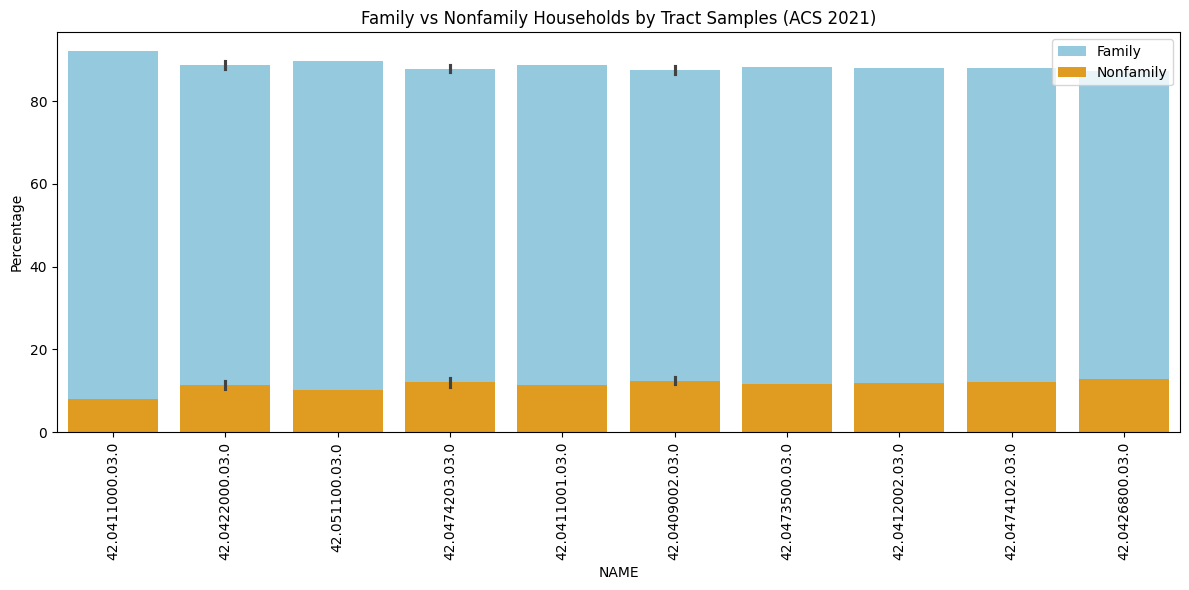

In [90]:
# Calculate percentages
acs5['% Family Households'] = 100 * acs5['Family Households'] / acs5['Total Households']
acs5['% Nonfamily Households'] = 100 * acs5['Nonfamily Households'] / acs5['Total Households']

# Plot family vs non-family households by state
plt.figure(figsize=(12, 6))
df_sorted = acs5.sort_values('% Family Households', ascending=False).head(20)
sns.barplot(x='NAME', y='% Family Households', data=df_sorted, color='skyblue', label='Family')
sns.barplot(x='NAME', y='% Nonfamily Households', data=df_sorted, color='orange', label='Nonfamily')
plt.xticks(rotation=90)
plt.title('Family vs Nonfamily Households by Tract Samples (ACS 2021)')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
new_acs5_cols = list(acs5_cols_to_rename.values())
acs5[new_acs5_cols] = acs5[new_acs5_cols].astype(float)

In [92]:
acs5 = acs5.copy()

# Convert numerical columns
acs5['Edu_High'] = acs5['Bachelors'] + acs5['Masters'] + acs5['Professional'] + acs5['Doctorate']
acs5['Edu_Rate'] = (acs5['Edu_High'] / acs5['Population']) * 100

age_range_values = '_'.join(str(val) for val in age_range_parsed)
age_range_column = f'Age_{age_range_values}'
age_range_pct_column = age_range_column+'_Pct'

M_age_range_column = f'M_Age_{age_range_values}'
M_age_range_pct_column = M_age_range_column+'_Pct'

F_age_range_column = f'F_Age_{age_range_values}'
F_age_range_pct_column = F_age_range_column+'_Pct'

# Example: % of people aged 25–44 (prime working/spending age)
acs5[age_range_column] = acs5[age_columns.values()].sum(axis=1)
acs5[age_range_pct_column] = (acs5[age_range_column] / acs5['Population']) * 100

acs5[M_age_range_column] = acs5[age_M_columns.values()].sum(axis=1)
acs5[M_age_range_pct_column] = (acs5[M_age_range_column] / acs5['Population']) * 100

acs5[F_age_range_column] = acs5[age_F_columns.values()].sum(axis=1)
acs5[F_age_range_pct_column] = (acs5[F_age_range_column] / acs5['Population']) * 100

# Simpson's Diversity Index example:
ethnic_cols = ['Other', 'Black', 'White', 
               'Native_Hawaiian_and_Other_Pacific_Islander', 
               'Asian', 'American_Indian_and_Alaska_Native']

ethnic_shares = acs5[ethnic_cols].div(acs5['Population'], axis=0)
acs5['Diversity_Index'] = 1 - (ethnic_shares ** 2).sum(axis=1)

# Step 1: Select Features
features = ['Population', 'Median_Income', 'Edu_Rate', 'Diversity_Index', age_range_column]

# Step 2: Drop rows with missing values (if any)
acs5_clean = acs5

# Step 3: Normalize the features (0–1 scale)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(acs5_clean[features])
acs5_scaled = pd.DataFrame(scaled_features, columns=features, index=acs5_clean.index)

# Step 4: Apply PCA to determine weights
pca = PCA(n_components=1)  # We only want the 1st principal component
pca.fit(acs5_scaled)

# Get PCA loadings (importance of each variable in PC1)
# PCA provides data-driven weights based on the underlying variance structure of the data

# We created a composite score using five community metrics. Based on data patterns, income and 
# education explain the majority of differences between areas, suggesting these should be primary 
# focus areas for resource allocation. Demographic diversity, while important, plays a smaller 
# statistical role in differentiation within this dataset.

loadings = np.abs(pca.components_[0])
weights = loadings / loadings.sum()  # Normalize to sum to 1

# Optional: print weights for interpretability
weights_df = pd.DataFrame({'Feature': features, 'Weight': weights})
print("PCA-derived weights:\n", weights_df)

# Step 5: Compute weighted score (socio-economic index)
acs5_clean['Score'] = acs5_scaled.dot(weights)

# Optional: Merge back with original dataset if rows were dropped
acs5.loc[acs5_clean.index, 'Score'] = acs5_clean['Score']


# Caculate poverty rate
acs5[['C17002_002E', 'C17002_003E']] = acs5[['C17002_002E', 'C17002_003E']].astype(float)
acs5["Poverty_Rate"] = (acs5["C17002_002E"] + acs5["C17002_003E"]) / acs5["Population"] * 100

display_columns = ['NAME', 'Population', 'Median_Income', 'Gini_Index', 
                   'Edu_High', 'Edu_Rate', 'Poverty_Rate', 'Median_Age', 
                   'Diversity_Index', age_range_pct_column, M_age_range_pct_column, 
                   F_age_range_pct_column, 'Score', 'year']

# Sort by Median Income (for example)
top_tracts = acs5[acs5['year'] == 2023].sort_values(by='Median_Income', ascending=False).head(10)
print('display top 10 tracts in a county with highest median income')
display(top_tracts[display_columns])

# Sort by Median Income (for example)
top_tracts = acs5[acs5['year'] == 2023].sort_values(by='Median_Income', ascending=True).head(10)
print('display top 10 tracts in a county with Lowest median income')
display(top_tracts[display_columns])


PCA-derived weights:
            Feature    Weight
0       Population  0.100401
1    Median_Income  0.187730
2         Edu_Rate  0.216876
3  Diversity_Index  0.417525
4        Age_18_55  0.077467
display top 10 tracts in a county with highest median income


,NAME,Population,Median_Income,Gini_Index,Edu_High,Edu_Rate,Poverty_Rate,Median_Age,Diversity_Index,Age_18_55_Pct,M_Age_18_55_Pct,F_Age_18_55_Pct,Score,year
4535,42.0422000.03.0,5264.0,250001.0,0.4822,3073.0,58.377660,1.291793,45.6,0.194320,40.292553,18.655015,21.637538,0.511147,2023.0
4511,42.0411001.03.0,4097.0,248085.0,0.3613,2283.0,55.723700,0.903100,42.9,0.215064,51.232609,28.630705,22.601904,0.505115,2023.0
4568,42.0446000.03.0,1582.0,202917.0,0.5137,861.0,54.424779,2.844501,43.7,0.146813,37.926675,21.112516,16.814159,0.391442,2023.0
4447,42.0140400.03.0,2167.0,190833.0,0.5188,1354.0,62.482695,5.537610,45.9,0.284493,40.101523,21.181357,18.920166,0.486705,2023.0
4514,42.0412003.03.0,6424.0,187804.0,0.3987,3259.0,50.731631,0.389166,40.8,0.289524,42.387920,21.092777,21.295143,0.511853,2023.0
4509,42.0409002.03.0,5659.0,187053.0,0.4336,2772.0,48.983919,0.000000,40.8,0.138273,46.156565,25.322495,20.834070,0.415803,2023.0
4513,42.0412002.03.0,4784.0,179896.0,0.3858,2677.0,55.957358,1.525920,40.3,0.361060,47.784281,26.505017,21.279264,0.540915,2023.0
4765,42.0563300.03.0,1427.0,179688.0,0.5387,739.0,51.786966,1.121233,50.4,0.101948,36.860547,17.309040,19.551507,0.339619,2023.0
4508,42.0409001.03.0,9324.0,174649.0,0.3988,4594.0,49.270699,5.351780,36.9,0.343129,49.056199,27.059202,21.996997,0.572021,2023.0
4627,42.0474102.03.0,3632.0,170000.0,0.4062,1907.0,52.505507,2.285242,41.9,0.254845,39.454846,20.071586,19.383260,0.446405,2023.0


display top 10 tracts in a county with Lowest median income


,NAME,Population,Median_Income,Gini_Index,Edu_High,Edu_Rate,Poverty_Rate,Median_Age,Diversity_Index,Age_18_55_Pct,M_Age_18_55_Pct,F_Age_18_55_Pct,Score,year
4410,42.050900.03.0,1539.0,13307.0,0.5331,85.0,5.523067,53.736192,27.0,0.173951,38.466537,11.565952,26.900585,0.132490,2023.0
4742,42.0551900.03.0,1453.0,14077.0,0.5092,25.0,1.720578,51.686167,40.1,0.645783,45.767378,19.270475,26.496903,0.384874,2023.0
4405,42.040500.03.0,2860.0,15534.0,0.5939,40.0,1.398601,61.503497,21.5,0.302056,92.552448,32.237762,60.314685,0.229430,2023.0
4441,42.0130600.03.0,3830.0,15912.0,0.6329,257.0,6.710183,52.924282,22.5,0.053067,39.295039,18.328982,20.966057,0.099157,2023.0
4601,42.0464400.03.0,2812.0,16924.0,0.5512,252.0,8.961593,47.226174,43.7,0.667249,40.042674,26.386913,13.655761,0.433554,2023.0
4744,42.0552100.03.0,1319.0,18210.0,0.4523,83.0,6.292646,43.593632,47.1,0.619121,34.268385,11.599697,22.668688,0.381491,2023.0
4411,42.051000.03.0,2099.0,19109.0,0.5159,214.0,10.195331,19.866603,23.0,0.621080,76.322058,43.830395,32.491663,0.413122,2023.0
4443,42.0130800.03.0,2128.0,24438.0,0.4749,159.0,7.471805,33.740602,30.0,0.286163,36.748120,7.142857,29.605263,0.215130,2023.0
4698,42.0513800.03.0,1979.0,24489.0,0.5015,102.0,5.154118,34.765033,33.7,0.394380,50.025265,29.661445,20.363820,0.270513,2023.0
4439,42.0120900.03.0,1610.0,24757.0,0.4851,171.0,10.621118,32.111801,39.3,0.426057,40.683230,19.130435,21.552795,0.295461,2023.0


* **Customer Segmentation** – Breaks down customers into targetable segments.

In [ ]:
# TODO: Review this and make it readable!!!
target_market.keys()

dict_keys(['description', 'demographics', 'usage_patterns', 'kpis_and_metrics_to_track', 'location_proximity', 'revenue_statistics', 'sources', 'anecdote'])

In [94]:
target_market['demographics']

{'age_range': '18–55',
 'gender_distribution': {'female': 60, 'male': 40},
 'household_income': {'median': 28000, 'range': '15,000–60,000'},
 'primary_residence': ['renters',
  'apartment dwellers',
  'students',
  'dual-income households',
  'middle-aged individuals',
  ''],
 'interpetation_and_strategic_insight': 'The laundromat clientele predominantly comprises renters and apartment dwellers, with a significant portion being students and dual-income households. Understanding this demographic is crucial for tailoring services and marketing efforts.'}

In [95]:
current_data = acs5[display_columns]
current_data.columns

Index(['NAME', 'Population', 'Median_Income', 'Gini_Index', 'Edu_High',
       'Edu_Rate', 'Poverty_Rate', 'Median_Age', 'Diversity_Index',
       'Age_18_55_Pct', 'M_Age_18_55_Pct', 'F_Age_18_55_Pct', 'Score', 'year'],
      dtype='object')

In [96]:
current_data = current_data.copy()
current_data['year'] = pd.to_datetime(current_data['year'], format='%Y')

In [97]:
features = ['Population', 'Median_Income', 'Gini_Index', 'Edu_High',
       'Edu_Rate', 'Poverty_Rate', 'Median_Age', 'Diversity_Index',
       'Age_18_55_Pct', 'M_Age_18_55_Pct', 'F_Age_18_55_Pct', 'Score']

current_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4784
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             4641 non-null   object        
 1   Population       4641 non-null   float64       
 2   Median_Income    4641 non-null   float64       
 3   Gini_Index       4641 non-null   float64       
 4   Edu_High         4641 non-null   float64       
 5   Edu_Rate         4641 non-null   float64       
 6   Poverty_Rate     4641 non-null   float64       
 7   Median_Age       4641 non-null   float64       
 8   Diversity_Index  4641 non-null   float64       
 9   Age_18_55_Pct    4641 non-null   float64       
 10  M_Age_18_55_Pct  4641 non-null   float64       
 11  F_Age_18_55_Pct  4641 non-null   float64       
 12  Score            4641 non-null   float64       
 13  year             4641 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(1)


In [ ]:
def interpolate_timeseries_rows(X):
    """
    Linearly interpolate missing values (NaNs) row-wise for 2D time series data.
    
    Parameters:
        X (np.ndarray): 2D NumPy array with shape (n_samples, n_timestamps)
    
    Returns:
        np.ndarray: Interpolated array of the same shape
    """
    interpolated = np.empty_like(X)
    
    for i in range(X.shape[0]):
        row = pd.Series(X.iloc[i])
        interpolated[i] = row.interpolate(method='linear', limit_direction='both').values
    
    return interpolated

In [112]:
pivoted = [interpolate_timeseries_rows(current_data.pivot(index='NAME', columns='year', values=feat)) for feat in features]

X = np.stack([p for p in pivoted], axis=-1)

# Normalize across time and stores per feature
n_samples, n_time, n_features = X.shape
X_reshaped = X.reshape(-1, n_features)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(n_samples, n_time, n_features)


In [116]:
warnings.filterwarnings("ignore", category=FutureWarning)


model = TimeSeriesKMeans(n_clusters=4, metric="softdtw", random_state=42)
labels = model.fit_predict(X_scaled)

In [117]:
census_tracts = current_data.pivot(index='NAME', columns='year', values=features[0]).index

# Add labels back to stores
df_labels = pd.DataFrame({'Store': census_tracts, 'Cluster': labels})

warnings.filterwarnings("default")

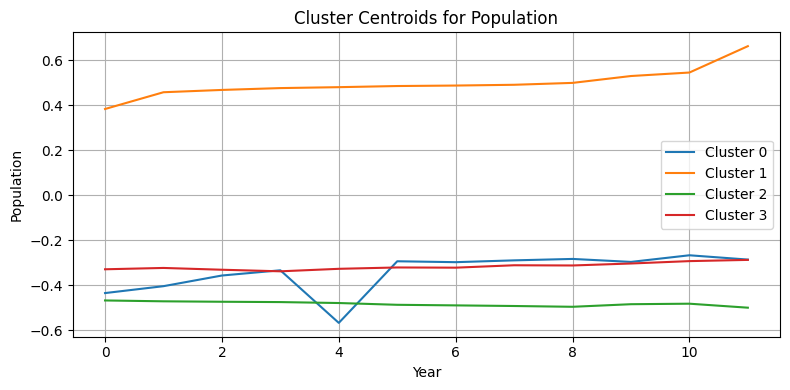

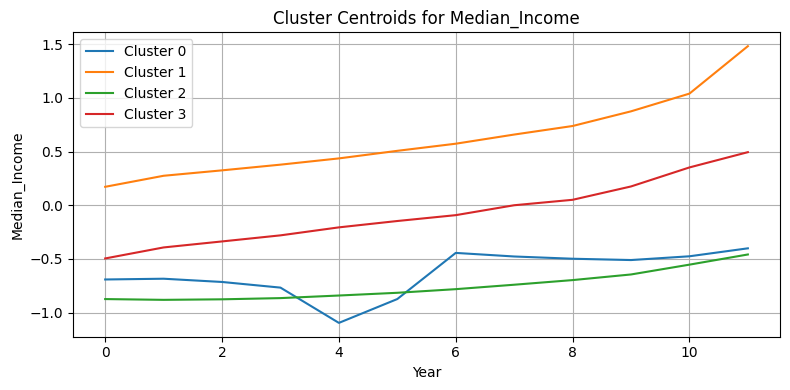

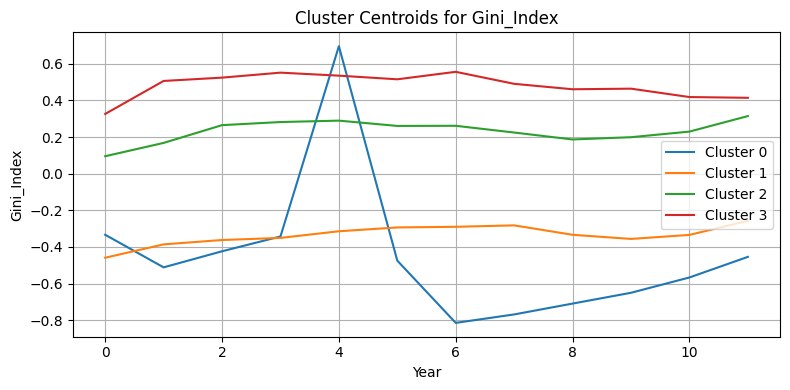

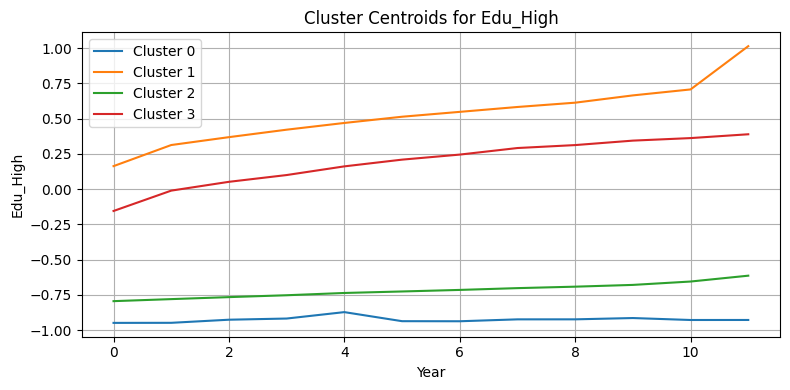

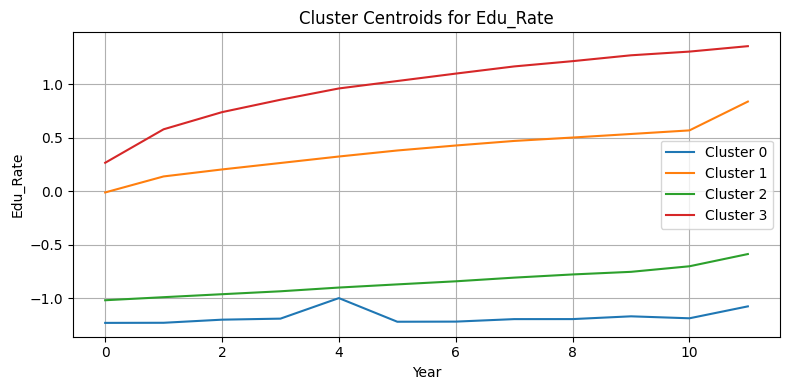

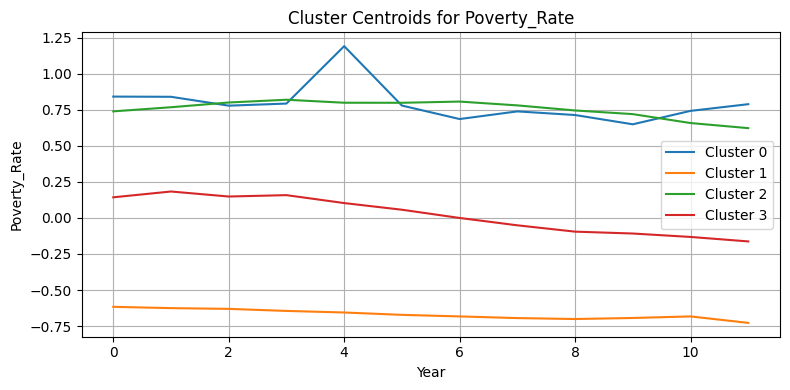

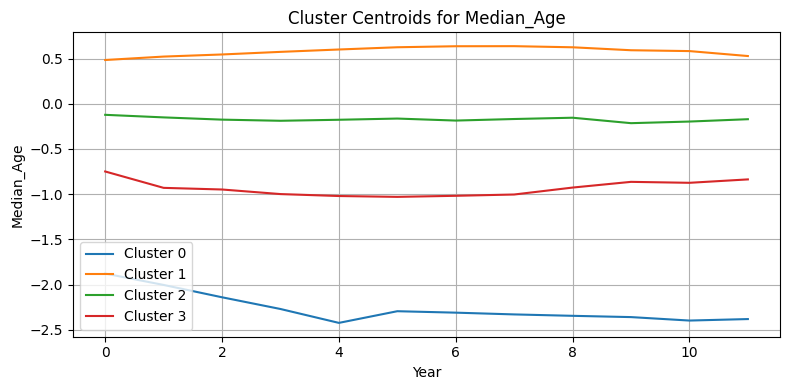

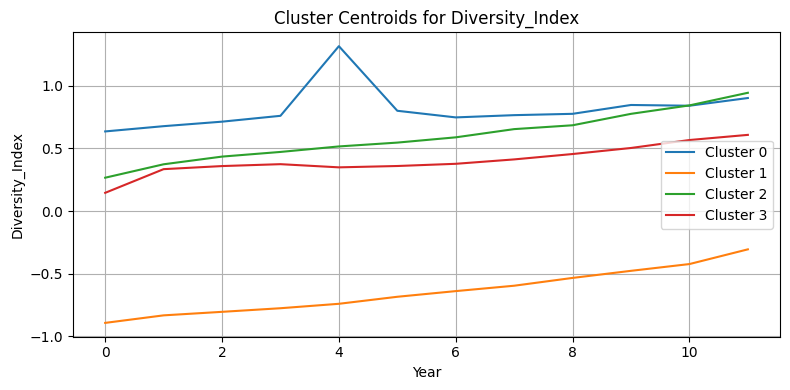

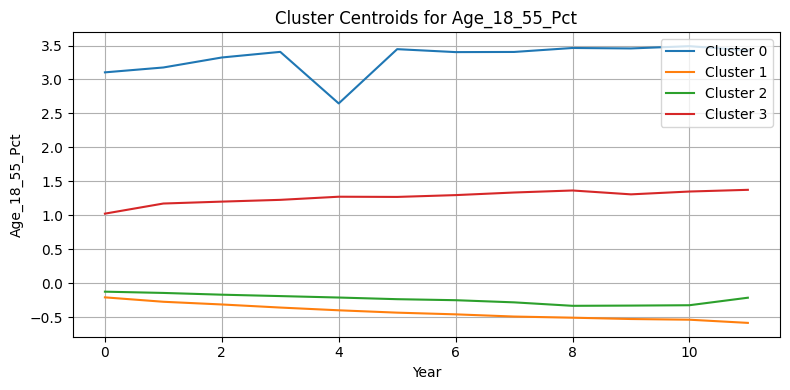

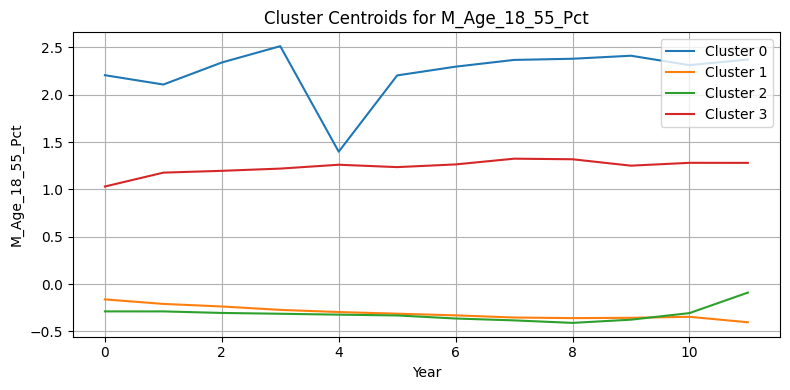

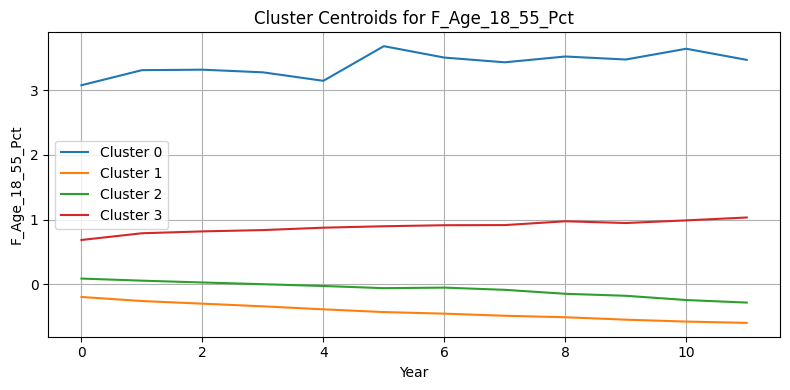

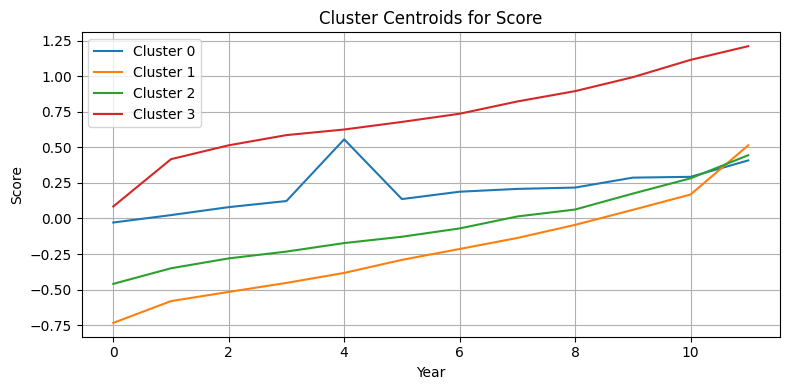

In [118]:
feature_names = features

for i, feature_name in enumerate(feature_names):
    plt.figure(figsize=(8, 4))
    for cluster_id, centroid in enumerate(model.cluster_centers_):
        plt.plot(centroid[:, i], label=f'Cluster {cluster_id}')
    plt.title(f'Cluster Centroids for {feature_name}')
    plt.xlabel('Year')
    plt.ylabel(feature_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


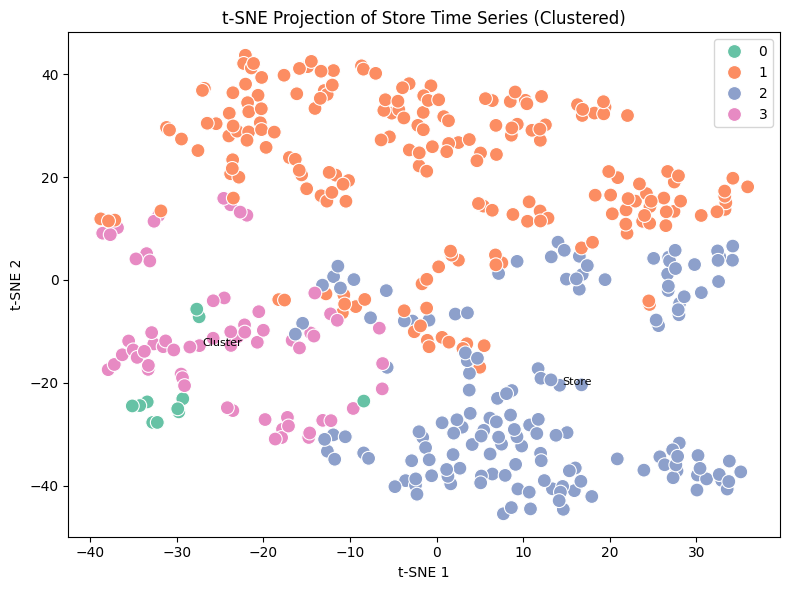

In [ ]:
from sklearn.manifold import TSNE

X_flat = X_scaled.reshape(n_samples, -1)
tsne = TSNE(n_components=2, perplexity=10, random_state=0, max_iter=1000)
X_tsne = tsne.fit_transform(X_flat)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="Set2", s=100)
for i, store in enumerate(df_labels):
    plt.text(X_tsne[i, 0]+0.3, X_tsne[i, 1], store, fontsize=8)
plt.title("t-SNE Projection of Census Tract Time Series (Clustered)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


### Optional Next Steps:
- Use geopandas to map this data geographically.
- Add business data using sources like Yelp API or Google Places API for competitor analysis.
- Use clustering (sklearn) to group similar counties/tracts.

## 3. Evaluate and Compare:  
- **Visit Potential Locations:** Conduct site visits to assess the suitability of each location firsthand
- **Cost Analysis:** Compare the costs of different 
    - locations
    - including rent
    - utilities
    - taxes  
- **Infrastructure:** Assess the availability of essential infrastructure, such as 
    - transportation
    - utilities
    - internet access
- **Pros and Cons:** Create a list of pros and cons for each potential location to help make a decision
- **Long-Term Growth Potential:** Consider the long-term growth potential of the area and its ability to support your business  

## 4. Consider Legal and Institutional Factors: 
- **Business Licenses:** Research the necessary business licenses and permits required for your business type and location. 
- **Local Regulations:** Understand any local regulations or restrictions that may affect your business operations.
- **Government Incentives:** Explore any local or state government incentives or programs that may be available for businesses in specific areas.
- **Zoning Laws:** Understand local zoning regulations and restrictions to ensure compliance